# Importando libs e load dos dados

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from statsmodels.stats import weightstats as stests
from scipy.stats import chi2_contingency

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_excel('Detran.xlsx')
df.head()

,ID,MUNICIPIO,SEXO,IDADE,CATEGORIA.CNH,TEMPO.CNH,ENVOL. ACIDENTE,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10
0,1,Salinopolis,M,32,AB,3.0,N,C,B,A,B,B,NaN,NaN,NaN,NaN,NaN
1,2,Salinopolis,M,38,A,10.0,N,A,B,A,B,B,NaN,NaN,NaN,NaN,NaN
2,3,Salinopolis,M,42,A,24.0,S,D,B,A,B,B,NaN,NaN,NaN,NaN,NaN
3,4,Salinopolis,M,24,AB,6.0,N,A,B,A,B,B,NaN,NaN,NaN,NaN,NaN
4,5,Salinopolis,M,23,AB,6.0,S,A,B,A,B,B,NaN,NaN,NaN,NaN,NaN


# EDA

##Limpeza do dataset e exploração

In [ ]:
#removendo colunas desnecessárias

#df = df.drop(['Q6','Q7','Q8','Q9','Q10'], axis=1)
df = df.rename(columns={'CATEGORIA.CNH':'CATEGORIA_CNH',
                        'TEMPO.CNH': 'TEMPO_CNH','ENVOL. ACIDENTE':'ENVOL_ACIDENTE'})
df.head()

,ID,MUNICIPIO,SEXO,IDADE,CATEGORIA_CNH,TEMPO_CNH,ENVOL_ACIDENTE,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10
0,1,Salinopolis,M,32,AB,3.0,N,C,B,A,B,B,NaN,NaN,NaN,NaN,NaN
1,2,Salinopolis,M,38,A,10.0,N,A,B,A,B,B,NaN,NaN,NaN,NaN,NaN
2,3,Salinopolis,M,42,A,24.0,S,D,B,A,B,B,NaN,NaN,NaN,NaN,NaN
3,4,Salinopolis,M,24,AB,6.0,N,A,B,A,B,B,NaN,NaN,NaN,NaN,NaN
4,5,Salinopolis,M,23,AB,6.0,S,A,B,A,B,B,NaN,NaN,NaN,NaN,NaN


In [ ]:
#vendo os valores nulos
df.isnull().sum()

ID                  0
MUNICIPIO           0
SEXO                0
IDADE               0
CATEGORIA_CNH       6
TEMPO_CNH          11
ENVOL_ACIDENTE      8
Q1                159
Q2                159
Q3                159
Q4                  0
Q5                 87
Q6                208
Q7                121
Q8                121
Q9                193
Q10               193
dtype: int64

In [ ]:
#substituindo todos valores categórios nulos por 'SI'
for i in df[['Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10']]:
  df.update(df[i].fillna('SI'))

In [ ]:
#verificando o único atributo numérico com NaN
df.query('TEMPO_CNH.isnull()', engine ='python')

,ID,MUNICIPIO,SEXO,IDADE,CATEGORIA_CNH,TEMPO_CNH,ENVOL_ACIDENTE,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10
43,44,Salinopolis,F,50,B,NaN,NaN,C,B,A,B,B,SI,SI,SI,SI,SI
49,50,Salinopolis,M,37,A,NaN,N,SI,SI,SI,B,B,C,C,B,SI,SI
64,65,Salinopolis,F,42,A,NaN,N,SI,SI,SI,B,B,C,C,B,SI,SI
77,78,Salinopolis,M,53,NaN,NaN,N,SI,SI,SI,B,SI,SI,C,B,D,D
84,85,Salinopolis,M,54,AB,NaN,N,SI,SI,SI,B,SI,SI,A,A,D,A
100,101,Salinopolis,F,42,AB,NaN,N,SI,SI,SI,B,SI,SI,B,B,D,C
108,109,Salinopolis,F,40,B,NaN,N,SI,SI,SI,B,SI,SI,C,B,D,D
125,126,Benevides,M,39,D,NaN,N,C,B,D,B,B,SI,SI,SI,SI,SI
195,196,Mosqueiro,F,45,B,NaN,S,SI,SI,SI,B,B,C,D,B,SI,SI
214,215,Bragaa,M,43,B,NaN,S,B,B,A,B,B,SI,SI,SI,SI,SI


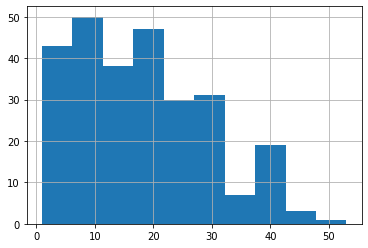

In [ ]:
df.TEMPO_CNH.hist()

In [ ]:
#substituindo os valores nulos pela média
df.update(df[i].fillna(df['TEMPO_CNH'].mean()))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              280 non-null    int64  
 1   MUNICIPIO       280 non-null    object 
 2   SEXO            280 non-null    object 
 3   IDADE           280 non-null    int64  
 4   CATEGORIA_CNH   274 non-null    object 
 5   TEMPO_CNH       269 non-null    float64
 6   ENVOL_ACIDENTE  272 non-null    object 
 7   Q1              280 non-null    object 
 8   Q2              280 non-null    object 
 9   Q3              280 non-null    object 
 10  Q4              280 non-null    object 
 11  Q5              280 non-null    object 
 12  Q6              280 non-null    object 
 13  Q7              280 non-null    object 
 14  Q8              280 non-null    object 
 15  Q9              280 non-null    object 
 16  Q10             280 non-null    object 
dtypes: float64(1), int64(2), object(14)

In [ ]:
#análise variáveis quantitativas
df.describe()

,ID,IDADE,TEMPO_CNH
count,280.000000,280.000000,269.000000
mean,140.500000,44.121429,18.163569
std,80.973247,11.761957,11.246360
min,1.000000,19.000000,1.000000
25%,70.750000,37.000000,10.000000
50%,140.500000,42.000000,17.000000
75%,210.250000,52.000000,25.000000
max,280.000000,79.000000,53.000000


##Contagem por questão

In [ ]:
#contagem de valores para cada questão
for i in df[['Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10']]:
  print(df[i].value_counts())



SI    159
B      51
A      32
C      22
D      16
Name: Q1, dtype: int64
SI    159
B     106
A      13
C       1
D       1
Name: Q2, dtype: int64
SI    159
A      94
D      19
C       4
B       4
Name: Q3, dtype: int64
B    276
D      3
A      1
Name: Q4, dtype: int64
B     189
SI     87
A       3
C       1
Name: Q5, dtype: int64
SI    208
C      69
D       2
B       1
Name: Q6, dtype: int64
SI    121
C      68
D      62
B      22
A       7
Name: Q7, dtype: int64
B     134
SI    121
C      14
A       6
D       5
Name: Q8, dtype: int64
SI    193
D      80
C       5
A       1
B       1
Name: Q9, dtype: int64
SI    193
D      59
C      12
B       9
A       7
Name: Q10, dtype: int64


##Sexo por questão

In [ ]:
df.head()

,ID,MUNICIPIO,SEXO,IDADE,CATEGORIA_CNH,TEMPO_CNH,ENVOL_ACIDENTE,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10
0,1,Salinopolis,M,32,AB,3.0,N,C,B,A,B,B,SI,SI,SI,SI,SI
1,2,Salinopolis,M,38,A,10.0,N,A,B,A,B,B,SI,SI,SI,SI,SI
2,3,Salinopolis,M,42,A,24.0,S,D,B,A,B,B,SI,SI,SI,SI,SI
3,4,Salinopolis,M,24,AB,6.0,N,A,B,A,B,B,SI,SI,SI,SI,SI
4,5,Salinopolis,M,23,AB,6.0,S,A,B,A,B,B,SI,SI,SI,SI,SI


In [ ]:
for i in df[['Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10']]:
  group = df.groupby(by=['SEXO', i])[i].count()
  print(group)

SEXO  Q1
F     A     10
      B     18
      C      5
      D      1
      SI    62
M     A     22
      B     33
      C     17
      D     15
      SI    97
Name: Q1, dtype: int64
SEXO  Q2
F     A      3
      B     29
      C      1
      D      1
      SI    62
M     A     10
      B     77
      SI    97
Name: Q2, dtype: int64
SEXO  Q3
F     A     27
      B      1
      D      6
      SI    62
M     A     67
      B      3
      C      4
      D     13
      SI    97
Name: Q3, dtype: int64
SEXO  Q4
F     B      96
M     A       1
      B     180
      D       3
Name: Q4, dtype: int64
SEXO  Q5
F     B      62
      C       1
      SI     33
M     A       3
      B     127
      SI     54
Name: Q5, dtype: int64
SEXO  Q6
F     C      28
      D       1
      SI     67
M     B       1
      C      41
      D       1
      SI    141
Name: Q6, dtype: int64
SEXO  Q7
F     A      5
      B     12
      C     20
      D     25
      SI    34
M     A      2
      B     10
      C     48
  

## Categoria CNH por questão

In [ ]:
for i in df[['Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10']]:
  group = df.groupby(by=['CATEGORIA_CNH', i])[i].count()
  print(group)

CATEGORIA_CNH  Q1
A              A      1
               B      3
               C      1
               D      2
               SI    12
AB             A     19
               B     19
               C      9
               D      8
               SI    60
AD             B      1
               D      1
               SI     5
AE             B      2
               SI     3
B              A      9
               B     18
               C      9
               D      3
               SI    63
C              D      1
               SI     1
D              A      3
               B      4
               C      2
               D      1
               SI    10
E              B      1
               SI     3
Name: Q1, dtype: int64
CATEGORIA_CNH  Q2
A              B      7
               SI    12
AB             A      9
               B     45
               D      1
               SI    60
AD             A      1
               B      1
               SI     5
AE             B      2
     

## Município por questão

In [ ]:
for i in df[['Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10']]:
  group = df.groupby(by=['MUNICIPIO', i])[i].count()
  print(group)

MUNICIPIO    Q1
Benevides    A      3
             B     10
             C      3
             D      1
             SI    30
Bragaa       A     16
             B     19
             C     11
             D      9
             SI    14
Mosqueiro    A      1
             B      1
             C      1
             D      1
             SI    36
Salinopolis  A     12
             B     21
             C      7
             D      5
             SI    79
Name: Q1, dtype: int64
MUNICIPIO    Q2
Benevides    A      2
             B     15
             SI    30
Bragaa       A      7
             B     47
             D      1
             SI    14
Mosqueiro    B      4
             SI    36
Salinopolis  A      4
             B     40
             C      1
             SI    79
Name: Q2, dtype: int64
MUNICIPIO    Q3
Benevides    A     12
             D      5
             SI    30
Bragaa       A     41
             B      3
             C      2
             D      9
             SI    14
Mosq

## Envolvido em acidente por questão

In [ ]:
for i in df[['Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10']]:
  group = df.groupby(by=['ENVOL_ACIDENTE', i])[i].count()
  print(group)

ENVOL_ACIDENTE  Q1
N               A      28
                B      37
                C      15
                D       9
                SI    116
S               A       3
                B      12
                C       4
                D       7
                SI     41
Name: Q1, dtype: int64
ENVOL_ACIDENTE  Q2
N               A      11
                B      76
                C       1
                D       1
                SI    116
S               A       1
                B      25
                SI     41
Name: Q2, dtype: int64
ENVOL_ACIDENTE  Q3
N               A      68
                B       2
                C       3
                D      16
                SI    116
S               A      21
                B       2
                C       1
                D       2
                SI     41
Name: Q3, dtype: int64
ENVOL_ACIDENTE  Q4
N               B     204
                D       1
S               A       1
                B      64
                D      

## Adicionando o gabarito ao df

In [ ]:
#perguntas com resposta A
def correcao(df):
  if df['Q3'] == 'SI':
    return 'SI'
  elif df['Q3'] == 'A':
    return 'correto'
  else:
    return 'incorreto'
df['Q3_gab'] = df.apply(correcao, axis = 1)

In [ ]:
#perguntas com resposta B
for i in df[['Q1','Q2','Q4','Q5','Q8']]:
  def correcao(df):
    if df[i] == 'SI':
      return 'SI'
    elif df[i] == 'B':
      return 'correto'
    else:
      return 'incorreto'
  df[str(i)+'_gab'] = df.apply(correcao, axis = 1)

In [ ]:
#perguntas com resposta C
for i in df[['Q6','Q7']]:
  def correcao(df):
    if df[i] == 'SI':
      return 'SI'
    elif df[i] == 'C':
      return 'correto'
    else:
      return 'incorreto'
  df[str(i)+'_gab'] = df.apply(correcao, axis = 1)

In [ ]:
#perguntas com resposta D
for i in df[['Q9','Q10']]:
  def correcao(df):
    if df[i] == 'SI':
      return 'SI'
    elif df[i] == 'D':
      return 'correto'
    else:
      return 'incorreto'
  df[str(i)+'_gab'] = df.apply(correcao, axis = 1)

In [ ]:
df.head()

,ID,MUNICIPIO,SEXO,IDADE,CATEGORIA_CNH,TEMPO_CNH,ENVOL_ACIDENTE,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q3_gab,Q1_gab,Q2_gab,Q4_gab,Q5_gab,Q8_gab,Q6_gab,Q7_gab,Q9_gab,Q10_gab
0,1,Salinopolis,M,32,AB,3.0,N,C,B,A,B,B,SI,SI,SI,SI,SI,correto,incorreto,correto,correto,correto,SI,SI,SI,SI,SI
1,2,Salinopolis,M,38,A,10.0,N,A,B,A,B,B,SI,SI,SI,SI,SI,correto,incorreto,correto,correto,correto,SI,SI,SI,SI,SI
2,3,Salinopolis,M,42,A,24.0,S,D,B,A,B,B,SI,SI,SI,SI,SI,correto,incorreto,correto,correto,correto,SI,SI,SI,SI,SI
3,4,Salinopolis,M,24,AB,6.0,N,A,B,A,B,B,SI,SI,SI,SI,SI,correto,incorreto,correto,correto,correto,SI,SI,SI,SI,SI
4,5,Salinopolis,M,23,AB,6.0,S,A,B,A,B,B,SI,SI,SI,SI,SI,correto,incorreto,correto,correto,correto,SI,SI,SI,SI,SI


# Data viz

## Resultado quantitativo das repostas ao questionário por questão

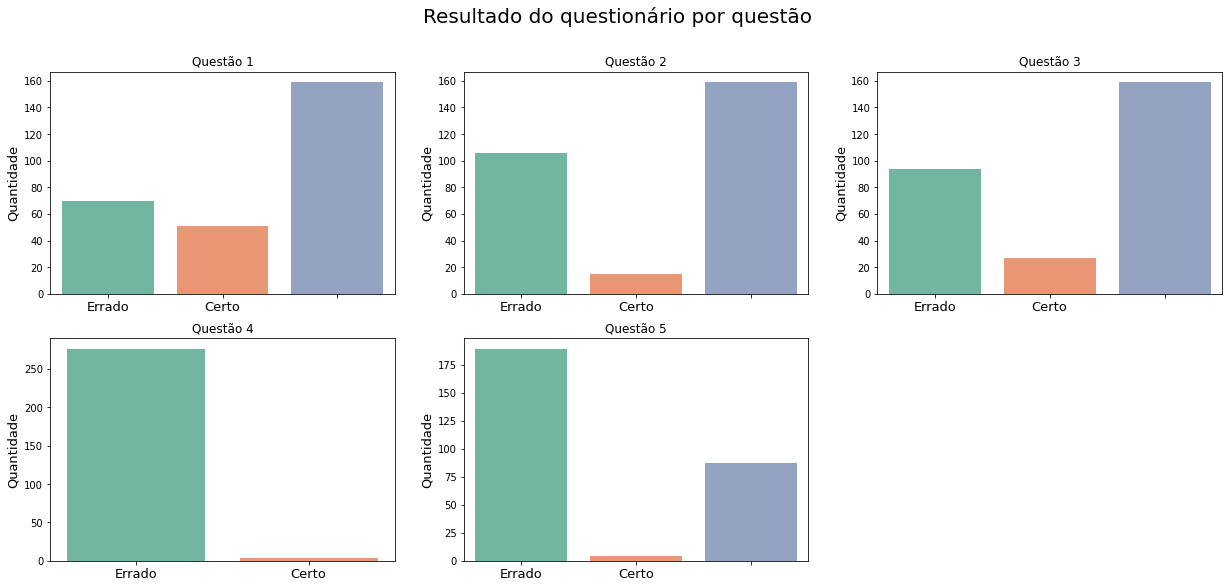

In [ ]:
plt.figure(figsize = (21, 9))
plt.suptitle('Resultado do questionário por questão', fontsize=20)

plt.subplot(2,3,1)
ax = sns.countplot(df.Q1_gab, palette="Set2")
ax.set_ylabel('Quantidade', fontsize= 13)
ax.set_xlabel('')
ax.set_xticklabels(['Errado','Certo'], fontsize=13)
plt.title('Questão 1')


plt.subplot(2,3,2)
ax = sns.countplot(df.Q2_gab, palette="Set2")
ax.set_ylabel('Quantidade', fontsize= 13)
ax.set_xlabel('')
ax.set_xticklabels(['Errado','Certo'], fontsize=13)
plt.title('Questão 2')


plt.subplot(2,3,3)
ax = sns.countplot(df.Q3_gab, palette="Set2")
ax.set_ylabel('Quantidade', fontsize= 13)
ax.set_xlabel('')
ax.set_xticklabels(['Errado','Certo'], fontsize=13)
plt.title('Questão 3')


plt.subplot(2,3,4)
ax = sns.countplot(df.Q4_gab, palette="Set2")
ax.set_ylabel('Quantidade', fontsize= 13)
ax.set_xlabel('')
ax.set_xticklabels(['Errado','Certo'], fontsize=13)
plt.title('Questão 4')


plt.subplot(2,3,5)
ax = sns.countplot(df.Q5_gab, palette="Set2")
ax.set_ylabel('Quantidade', fontsize= 13)
ax.set_xlabel('')
ax.set_xticklabels(['Errado','Certo'], fontsize=13)
plt.title('Questão 5');


##Catplot por idade por questão

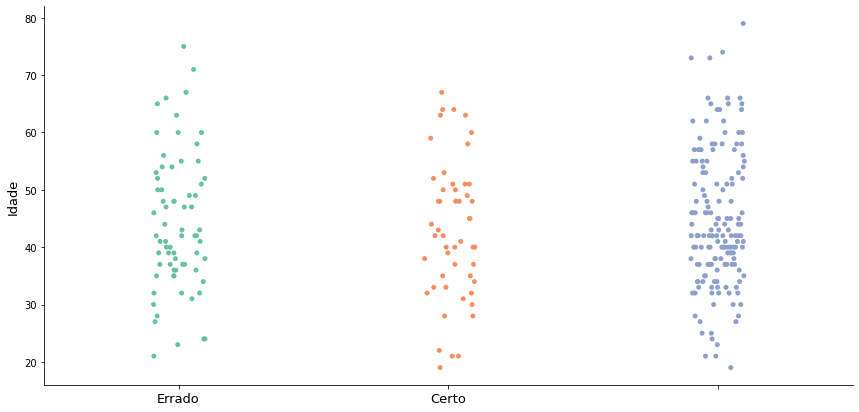

In [ ]:
ax = sns.catplot(x='Q1_gab', y='IDADE', data=df, height=6, aspect=2, palette="Set2")
ax.set_ylabels('Idade', fontsize=13)
ax.set_xlabels('')
ax.set_xticklabels(['Errado','Certo'], fontsize=13);
ax

## Violinplot do tempo de cnh por questão

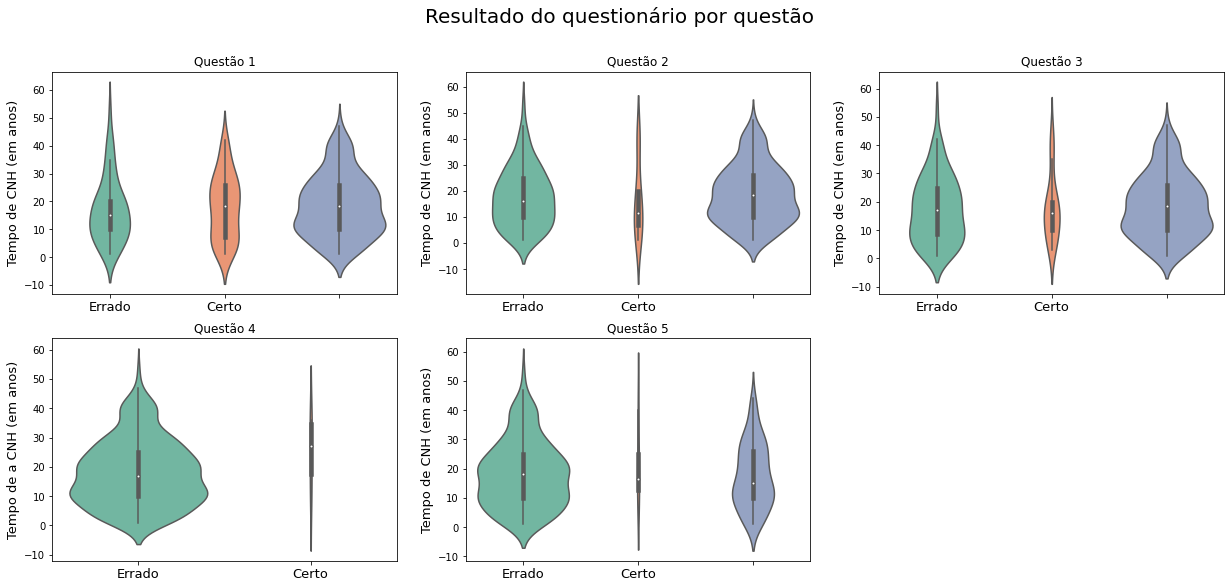

In [ ]:
plt.figure(figsize = (21, 9))
plt.suptitle('Resultado do questionário por questão', fontsize=20)

plt.subplot(2,3,1)
ax = sns.violinplot(x='Q1_gab', y='TEMPO_CNH', data=df, palette="Set2", scale='count') #mostrando o acumulo dos dados
ax.set_ylabel('Tempo de CNH (em anos)', fontsize=13)
ax.set_xlabel('')
ax.set_xticklabels(['Errado','Certo'], fontsize=13)
plt.title('Questão 1')


plt.subplot(2,3,2)
ax = sns.violinplot(x='Q2_gab', y='TEMPO_CNH', data=df, palette="Set2", scale='count') #mostrando o acumulo dos dados
ax.set_ylabel('Tempo de CNH (em anos)', fontsize=13)
ax.set_xlabel('')
ax.set_xticklabels(['Errado','Certo'], fontsize=13)
plt.title('Questão 2')

plt.subplot(2,3,3)
ax = sns.violinplot(x='Q3_gab', y='TEMPO_CNH', data=df, palette="Set2", scale='count') #mostrando o acumulo dos dados
ax.set_ylabel('Tempo de CNH (em anos)', fontsize=13)
ax.set_xlabel('')
ax.set_xticklabels(['Errado','Certo'], fontsize=13)
plt.title('Questão 3')

plt.subplot(2,3,4)
ax = sns.violinplot(x='Q4_gab', y='TEMPO_CNH', data=df, palette="Set2", scale='count') #mostrando o acumulo dos dados
ax.set_ylabel('Tempo de a CNH (em anos)', fontsize=13)
ax.set_xlabel('')
ax.set_xticklabels(['Errado','Certo'], fontsize=13)
plt.title('Questão 4')

plt.subplot(2,3,5)
ax = sns.violinplot(x='Q5_gab', y='TEMPO_CNH', data=df, palette="Set2", scale='count') #mostrando o acumulo dos dados
ax.set_ylabel('Tempo de CNH (em anos)', fontsize=13)
ax.set_xlabel('')
ax.set_xticklabels(['Errado','Certo'], fontsize=13);
plt.title('Questão 5');


##Boxplots da idade relacionada com as variáveis qualitativas por questão

Text(0.5, 1.0, 'Questão 5')

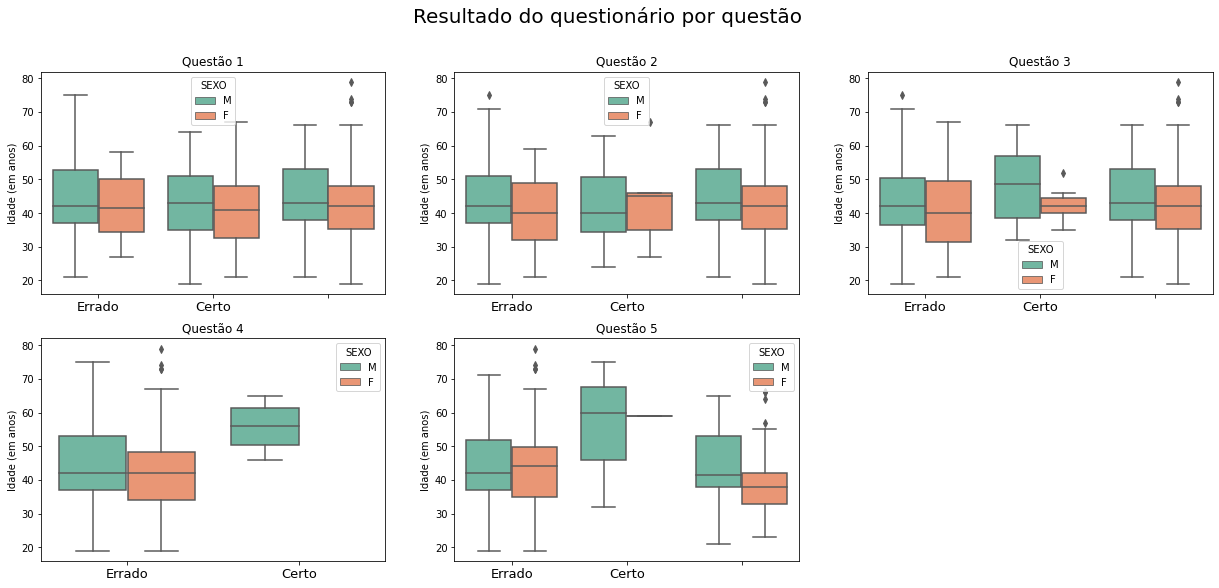

In [ ]:
plt.figure(figsize = (21, 9))
plt.suptitle('Resultado do questionário por questão', fontsize=20)

plt.subplot(2,3,1)
ax = sns.boxplot(x='Q1_gab', y='IDADE', hue='SEXO', data=df, palette="Set2")
ax.set_ylabel('Idade (em anos)')
ax.set_xlabel('')
ax.set_xticklabels(['Errado','Certo'], fontsize=13)
plt.title('Questão 1')

plt.subplot(2,3,2)
ax = sns.boxplot(x='Q2_gab', y='IDADE', hue='SEXO', data=df, palette="Set2")
ax.set_ylabel('Idade (em anos)')
ax.set_xlabel('')
ax.set_xticklabels(['Errado','Certo'], fontsize=13)
plt.title('Questão 2')

plt.subplot(2,3,3)
ax = sns.boxplot(x='Q3_gab', y='IDADE', hue='SEXO', data=df, palette="Set2")
ax.set_ylabel('Idade (em anos)')
ax.set_xlabel('')
ax.set_xticklabels(['Errado','Certo'], fontsize=13)
plt.title('Questão 3')

plt.subplot(2,3,4)
ax = sns.boxplot(x='Q4_gab', y='IDADE', hue='SEXO', data=df, palette="Set2")
ax.set_ylabel('Idade (em anos)')
ax.set_xlabel('')
ax.set_xticklabels(['Errado','Certo'], fontsize=13)
plt.title('Questão 4')

plt.subplot(2,3,5)
ax = sns.boxplot(x='Q5_gab', y='IDADE', hue='SEXO', data=df, palette="Set2")
ax.set_ylabel('Idade (em anos)')
ax.set_xlabel('')
ax.set_xticklabels(['Errado','Certo'], fontsize=13);
plt.title('Questão 5')


Text(0.5, 1.0, 'Questão 5')

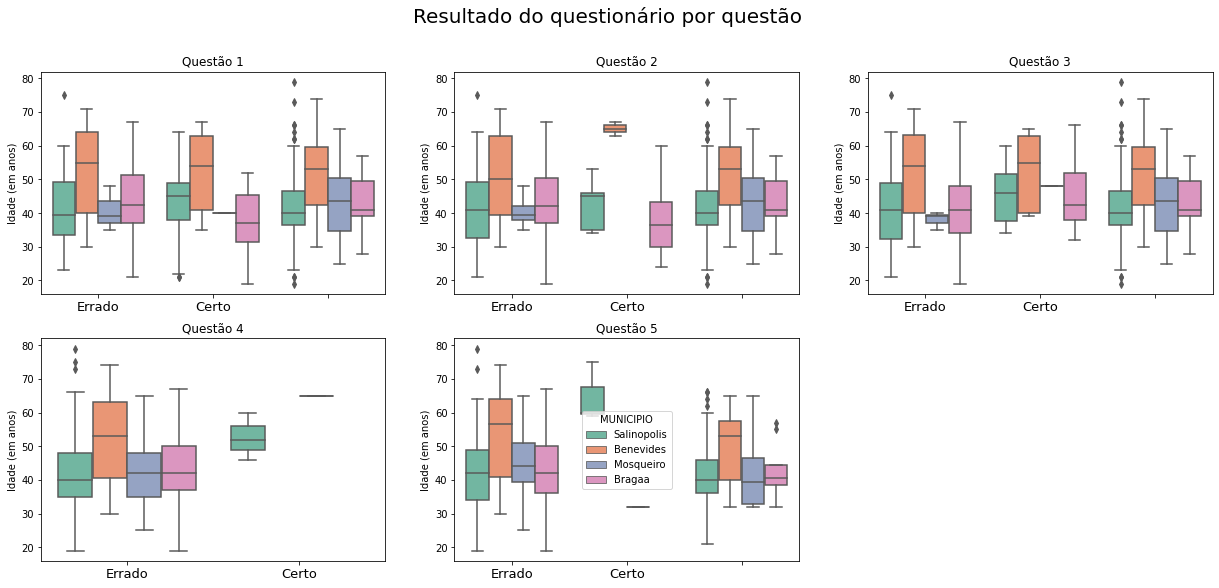

In [ ]:
plt.figure(figsize = (21, 9))
plt.suptitle('Resultado do questionário por questão', fontsize=20)

plt.subplot(2,3,1)
ax = sns.boxplot(x='Q1_gab', y='IDADE', hue='MUNICIPIO', data=df, palette="Set2")
ax.set_ylabel('Idade (em anos)')
ax.set_xlabel('')
ax.set_xticklabels(['Errado','Certo'], fontsize=13)
ax.get_legend().remove()
plt.title('Questão 1')

plt.subplot(2,3,2)
ax = sns.boxplot(x='Q2_gab', y='IDADE', hue='MUNICIPIO', data=df, palette="Set2")
ax.set_ylabel('Idade (em anos)')
ax.set_xlabel('')
ax.set_xticklabels(['Errado','Certo'], fontsize=13)
ax.get_legend().remove()
plt.title('Questão 2')

plt.subplot(2,3,3)
ax = sns.boxplot(x='Q3_gab', y='IDADE', hue='MUNICIPIO', data=df, palette="Set2")
ax.set_ylabel('Idade (em anos)')
ax.set_xlabel('')
ax.set_xticklabels(['Errado','Certo'], fontsize=13)
ax.get_legend().remove()
plt.title('Questão 3')

plt.subplot(2,3,4)
ax = sns.boxplot(x='Q4_gab', y='IDADE', hue='MUNICIPIO', data=df, palette="Set2")
ax.set_ylabel('Idade (em anos)')
ax.set_xlabel('')
ax.set_xticklabels(['Errado','Certo'], fontsize=13)
ax.get_legend().remove()
plt.title('Questão 4')

plt.subplot(2,3,5)
ax = sns.boxplot(x='Q5_gab', y='IDADE', hue='MUNICIPIO', data=df, palette="Set2")
ax.set_ylabel('Idade (em anos)')
ax.set_xlabel('')
ax.set_xticklabels(['Errado','Certo'], fontsize=13);
plt.title('Questão 5')


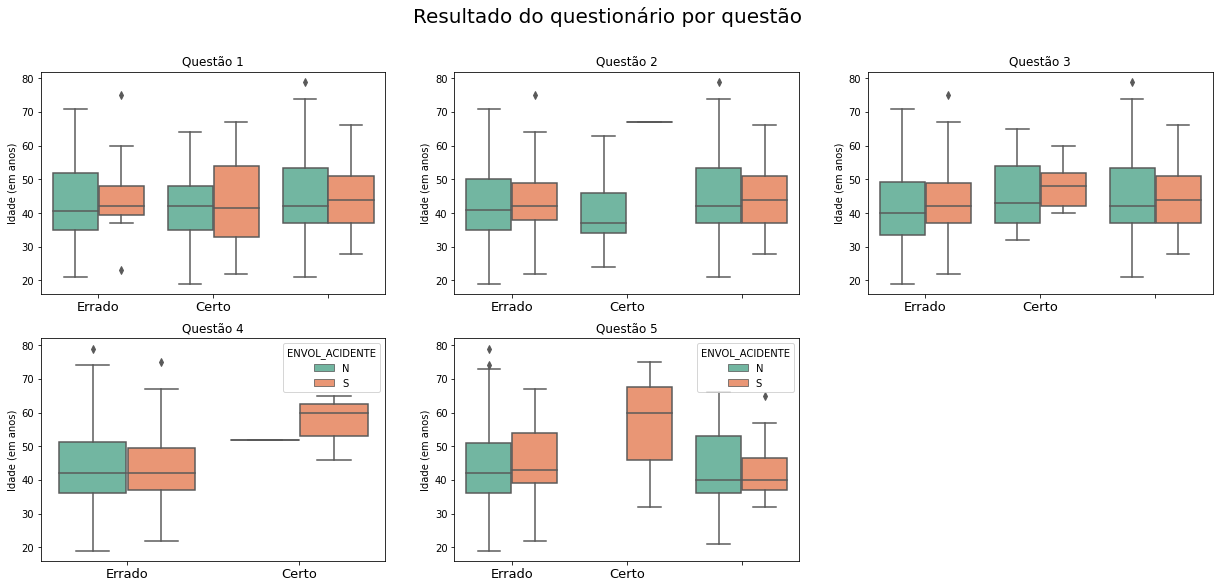

In [ ]:
plt.figure(figsize = (21, 9))
plt.suptitle('Resultado do questionário por questão', fontsize=20)

plt.subplot(2,3,1)
ax = sns.boxplot(x='Q1_gab', y='IDADE', hue='ENVOL_ACIDENTE', data=df, palette="Set2")
ax.set_ylabel('Idade (em anos)')
ax.set_xlabel('')
ax.set_xticklabels(['Errado','Certo'], fontsize=13)
ax.get_legend().remove()
plt.title('Questão 1')

plt.subplot(2,3,2)
ax = sns.boxplot(x='Q2_gab', y='IDADE', hue='ENVOL_ACIDENTE', data=df, palette="Set2")
ax.set_ylabel('Idade (em anos)')
ax.set_xlabel('')
ax.set_xticklabels(['Errado','Certo'], fontsize=13)
ax.get_legend().remove()
plt.title('Questão 2')

plt.subplot(2,3,3)
ax = sns.boxplot(x='Q3_gab', y='IDADE', hue='ENVOL_ACIDENTE', data=df, palette="Set2")
ax.set_ylabel('Idade (em anos)')
ax.set_xlabel('')
ax.set_xticklabels(['Errado','Certo'], fontsize=13)
ax.get_legend().remove()
plt.title('Questão 3')

plt.subplot(2,3,4)
ax = sns.boxplot(x='Q4_gab', y='IDADE', hue='ENVOL_ACIDENTE', data=df, palette="Set2")
ax.set_ylabel('Idade (em anos)')
ax.set_xlabel('')
ax.set_xticklabels(['Errado','Certo'], fontsize=13)
plt.title('Questão 4')

plt.subplot(2,3,5)
ax = sns.boxplot(x='Q5_gab', y='IDADE', hue='ENVOL_ACIDENTE', data=df, palette="Set2")
ax.set_ylabel('Idade (em anos)')
ax.set_xlabel('')
ax.set_xticklabels(['Errado','Certo'], fontsize=13);
plt.title('Questão 5');


##Boxplots do tempo de cnh relacionada com as variáveis qualitativas por questão

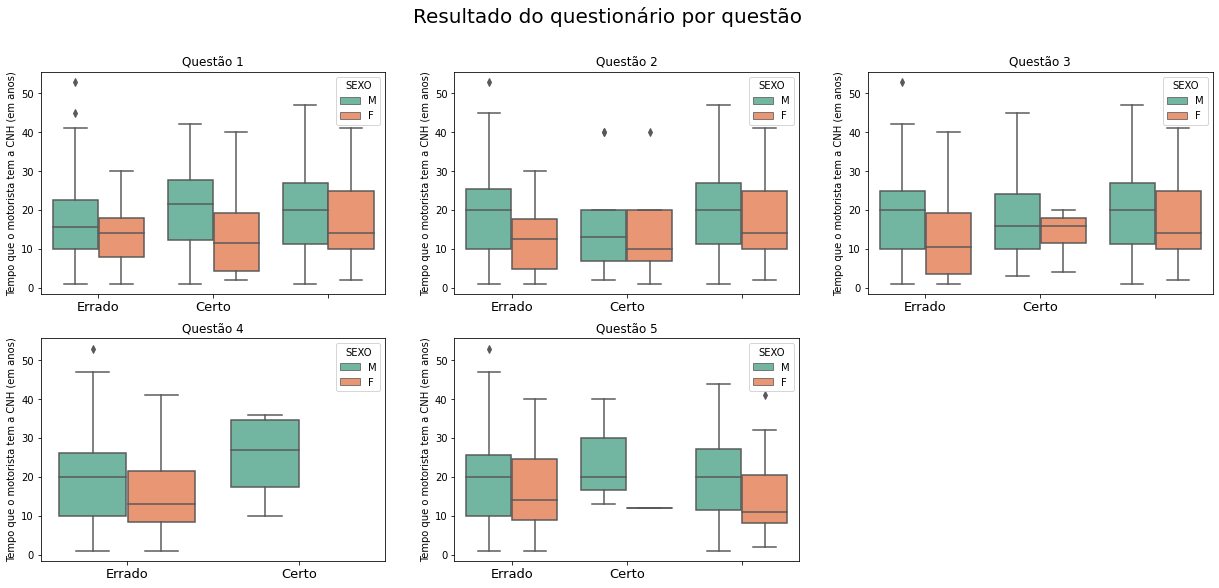

In [ ]:
plt.figure(figsize = (21, 9))
plt.suptitle('Resultado do questionário por questão', fontsize=20)

plt.subplot(2,3,1)
ax = sns.boxplot(x='Q1_gab', y='TEMPO_CNH', hue='SEXO', data=df, palette="Set2")
ax.set_ylabel('Tempo que o motorista tem a CNH (em anos)')
ax.set_xlabel('')
ax.set_xticklabels(['Errado','Certo'], fontsize=13)
plt.title('Questão 1')

plt.subplot(2,3,2)
ax = sns.boxplot(x='Q2_gab', y='TEMPO_CNH', hue='SEXO', data=df, palette="Set2")
ax.set_ylabel('Tempo que o motorista tem a CNH (em anos)')
ax.set_xlabel('')
ax.set_xticklabels(['Errado','Certo'], fontsize=13)
plt.title('Questão 2')

plt.subplot(2,3,3)
ax = sns.boxplot(x='Q3_gab', y='TEMPO_CNH', hue='SEXO', data=df, palette="Set2")
ax.set_ylabel('Tempo que o motorista tem a CNH (em anos)')
ax.set_xlabel('')
ax.set_xticklabels(['Errado','Certo'], fontsize=13)
plt.title('Questão 3')

plt.subplot(2,3,4)
ax = sns.boxplot(x='Q4_gab', y='TEMPO_CNH', hue='SEXO', data=df, palette="Set2")
ax.set_ylabel('Tempo que o motorista tem a CNH (em anos)')
ax.set_xlabel('')
ax.set_xticklabels(['Errado','Certo'], fontsize=13)
plt.title('Questão 4')

plt.subplot(2,3,5)
ax = sns.boxplot(x='Q5_gab', y='TEMPO_CNH', hue='SEXO', data=df, palette="Set2")
ax.set_ylabel('Tempo que o motorista tem a CNH (em anos)')
ax.set_xlabel('')
ax.set_xticklabels(['Errado','Certo'], fontsize=13);
plt.title('Questão 5');


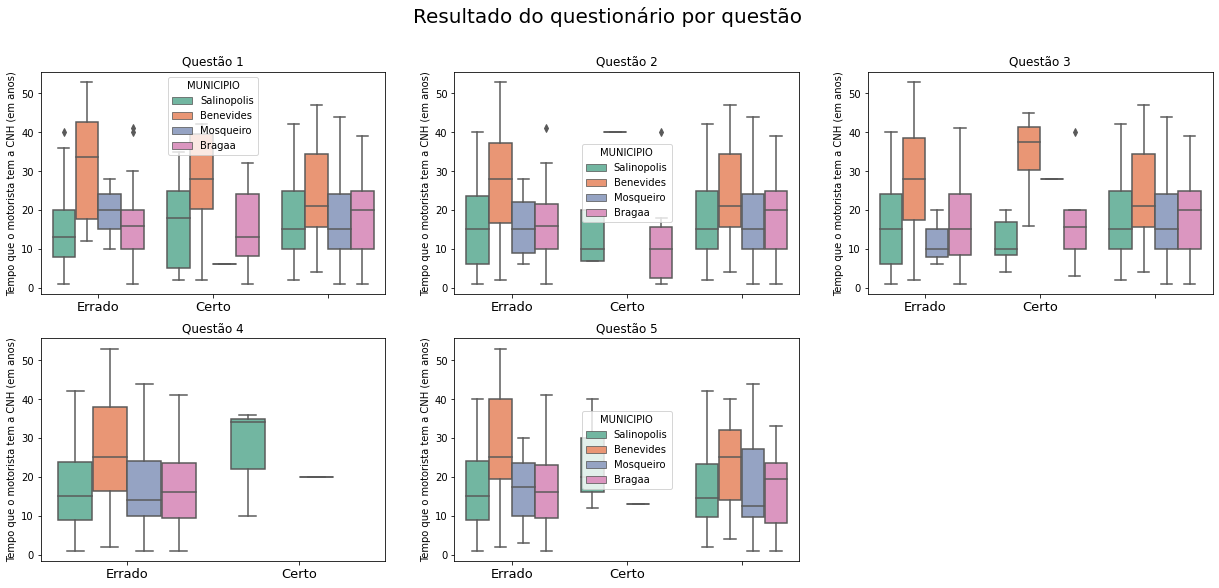

In [ ]:
plt.figure(figsize = (21, 9))
plt.suptitle('Resultado do questionário por questão', fontsize=20)

plt.subplot(2,3,1)
ax = sns.boxplot(x='Q1_gab', y='TEMPO_CNH', hue='MUNICIPIO', data=df, palette="Set2")
ax.set_ylabel('Tempo que o motorista tem a CNH (em anos)')
ax.set_xlabel('')
ax.set_xticklabels(['Errado','Certo'], fontsize=13)
plt.title('Questão 1')

plt.subplot(2,3,2)
ax = sns.boxplot(x='Q2_gab', y='TEMPO_CNH', hue='MUNICIPIO', data=df, palette="Set2")
ax.set_ylabel('Tempo que o motorista tem a CNH (em anos)')
ax.set_xlabel('')
ax.set_xticklabels(['Errado','Certo'], fontsize=13)
plt.title('Questão 2')

plt.subplot(2,3,3)
ax = sns.boxplot(x='Q3_gab', y='TEMPO_CNH', hue='MUNICIPIO', data=df, palette="Set2")
ax.set_ylabel('Tempo que o motorista tem a CNH (em anos)')
ax.set_xlabel('')
ax.set_xticklabels(['Errado','Certo'], fontsize=13)
ax.get_legend().remove()
plt.title('Questão 3')

plt.subplot(2,3,4)
ax = sns.boxplot(x='Q4_gab', y='TEMPO_CNH', hue='MUNICIPIO', data=df, palette="Set2")
ax.set_ylabel('Tempo que o motorista tem a CNH (em anos)')
ax.set_xlabel('')
ax.set_xticklabels(['Errado','Certo'], fontsize=13)
ax.get_legend().remove()
plt.title('Questão 4')

plt.subplot(2,3,5)
ax = sns.boxplot(x='Q5_gab', y='TEMPO_CNH', hue='MUNICIPIO', data=df, palette="Set2")
ax.set_ylabel('Tempo que o motorista tem a CNH (em anos)')
ax.set_xlabel('')
ax.set_xticklabels(['Errado','Certo'], fontsize=13);
plt.title('Questão 5');


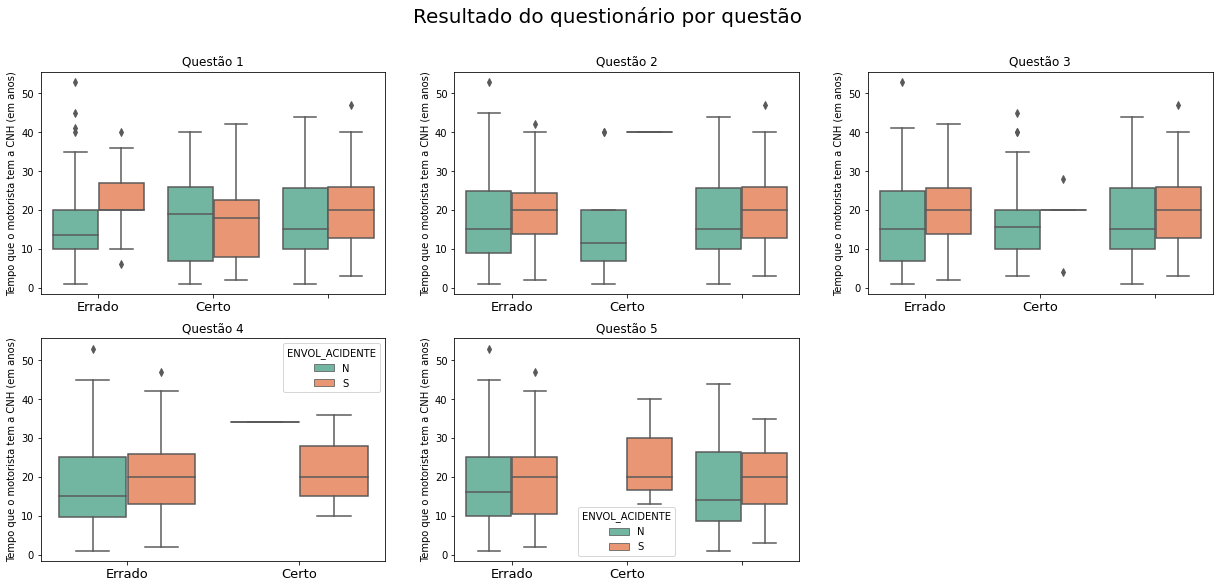

In [ ]:
plt.figure(figsize = (21, 9))
plt.suptitle('Resultado do questionário por questão', fontsize=20)

plt.subplot(2,3,1)
ax = sns.boxplot(x='Q1_gab', y='TEMPO_CNH', hue='ENVOL_ACIDENTE', data=df, palette="Set2")
ax.set_ylabel('Tempo que o motorista tem a CNH (em anos)')
ax.set_xlabel('')
ax.set_xticklabels(['Errado','Certo'], fontsize=13)
ax.get_legend().remove()
plt.title('Questão 1')

plt.subplot(2,3,2)
ax = sns.boxplot(x='Q2_gab', y='TEMPO_CNH', hue='ENVOL_ACIDENTE', data=df, palette="Set2")
ax.set_ylabel('Tempo que o motorista tem a CNH (em anos)')
ax.set_xlabel('')
ax.set_xticklabels(['Errado','Certo'], fontsize=13)
ax.get_legend().remove()
plt.title('Questão 2')

plt.subplot(2,3,3)
ax = sns.boxplot(x='Q3_gab', y='TEMPO_CNH', hue='ENVOL_ACIDENTE', data=df, palette="Set2")
ax.set_ylabel('Tempo que o motorista tem a CNH (em anos)')
ax.set_xlabel('')
ax.set_xticklabels(['Errado','Certo'], fontsize=13)
ax.get_legend().remove()
plt.title('Questão 3')

plt.subplot(2,3,4)
ax = sns.boxplot(x='Q4_gab', y='TEMPO_CNH', hue='ENVOL_ACIDENTE', data=df, palette="Set2")
ax.set_ylabel('Tempo que o motorista tem a CNH (em anos)')
ax.set_xlabel('')
ax.set_xticklabels(['Errado','Certo'], fontsize=13)
plt.title('Questão 4')

plt.subplot(2,3,5)
ax = sns.boxplot(x='Q5_gab', y='TEMPO_CNH', hue='ENVOL_ACIDENTE', data=df, palette="Set2")
ax.set_ylabel('Tempo que o motorista tem a CNH (em anos)')
ax.set_xlabel('')
ax.set_xticklabels(['Errado','Certo'], fontsize=13);
plt.title('Questão 5');


## Distplot

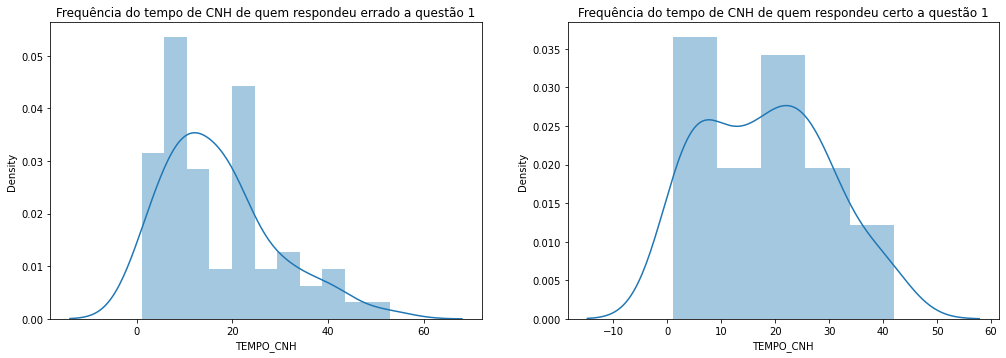

In [ ]:
errado = df.query('Q1_gab == "incorreto"')['TEMPO_CNH']
certo = df.query('Q1_gab == "correto"')['TEMPO_CNH']

plt.figure(figsize=(17,12))

plt.subplot(2, 2, 1)
sns.distplot(errado)
plt.title('Frequência do tempo de CNH de quem respondeu errado a questão 1')

plt.subplot(2, 2, 2)
sns.distplot(certo)
plt.title('Frequência do tempo de CNH de quem respondeu certo a questão 1');


# Teste de Hipótese

##Teste Z


### Escolhendo a hipótese nula e a alternativa:
H0 = A distribuição do tempo de CNH não difere entre as pessoas que erraram e as que acertaram a questão 1.

H1 = A distribuição do tempo de CNH difere entre as pessoas que erraran e as que acertaram a questão 1.


In [ ]:
errado = df.query('Q1_gab == "incorreto"')['TEMPO_CNH']
certo = df.query('Q1_gab == "correto"')['TEMPO_CNH']

ztest, pvalue = stests.ztest(x1=errado, x2=certo)
if pvalue < 0.05:
  print('Como o p-value: {:.3f} e é menor que 5% temos evidências o suficiente para rejeitar a hipótese nula'.format(pvalue))
else:
  print('Como o p-value: {:.3f} e é maior que 5% não temos evidências o suficiente para rejeitar a hipótese nula'.format(pvalue))

Como o p-value: nan e é maior que 5% não temos evidências o suficiente para rejeitar a hipótese nula


### Escolhendo a hipótese nula e a alternativa:
H0 = A distribuição do tempo de CNH não difere entre as pessoas que erraram e as que acertaram a questão 2.

H1 = A distribuição do tempo de CNH difere entre as pessoas que erraran e as que acertaram a questão 2.

In [ ]:
errado = df.query('Q2_gab == "incorreto"')['TEMPO_CNH']
certo = df.query('Q2_gab == "correto"')['TEMPO_CNH']

ztest, pvalue = stests.ztest(x1=errado, x2=certo)
if pvalue < 0.05:
  print('Como o p-value: {:.3f} e é menor que 5% temos evidências o suficiente para rejeitar a hipótese nula'.format(pvalue))
else:
  print('Como o p-value: {:.3f} e é maior que 5% não temos evidências o suficiente para rejeitar a hipótese nula'.format(pvalue))

Como o p-value: nan e é maior que 5% não temos evidências o suficiente para rejeitar a hipótese nula


### Escolhendo a hipótese nula e a alternativa:
H0 = A distribuição do tempo de CNH não difere entre as pessoas que erraram e as que acertaram a questão 3.

H1 = A distribuição do tempo de CNH difere entre as pessoas que erraran e as que acertaram a questão 3.

In [ ]:
errado = df.query('Q3_gab == "incorreto"')['TEMPO_CNH']
certo = df.query('Q3_gab == "correto"')['TEMPO_CNH']

ztest, pvalue = stests.ztest(x1=errado, x2=certo)
if pvalue < 0.05:
  print('Como o p-value: {:.3f} e é menor que 5% temos evidências o suficiente para rejeitar a hipótese nula'.format(pvalue))
else:
  print('Como o p-value: {:.3f} e é maior que 5% não temos evidências o suficiente para rejeitar a hipótese nula'.format(pvalue))

Como o p-value: nan e é maior que 5% não temos evidências o suficiente para rejeitar a hipótese nula


In [ ]:
errado = df.query('Q4_gab == "incorreto"')['TEMPO_CNH']
certo = df.query('Q4_gab == "correto"')['TEMPO_CNH']

ztest, pvalue = stests.ztest(x1=errado, x2=certo)
if pvalue < 0.05:
  print('Como o p-value: {:.3f} e é menor que 5% temos evidências o suficiente para rejeitar a hipótese nula'.format(pvalue))
else:
  print('Como o p-value: {:.3f} e é maior que 5% não temos evidências o suficiente para rejeitar a hipótese nula'.format(pvalue))

Como o p-value: nan e é maior que 5% não temos evidências o suficiente para rejeitar a hipótese nula


In [ ]:
errado = df.query('Q5_gab == "incorreto"')['TEMPO_CNH']
certo = df.query('Q5_gab == "correto"')['TEMPO_CNH']

ztest, pvalue = stests.ztest(x1=errado, x2=certo)
if pvalue < 0.05:
  print('Como o p-value: {:.3f} e é menor que 5% temos evidências o suficiente para rejeitar a hipótese nula'.format(pvalue))
else:
  print('Como o p-value: {:.3f} e é maior que 5% não temos evidências o suficiente para rejeitar a hipótese nula'.format(pvalue))

Como o p-value: nan e é maior que 5% não temos evidências o suficiente para rejeitar a hipótese nula


## Teste Qui-quadrado

### Sexo X acerto ou erro nas questões

Q1_gab        SI   correto  incorreto
SEXO                                 
F       0.645833  0.187500   0.166667
M       0.527174  0.179348   0.293478
Como p-valor = 0.0595, não há evidências suficientes para rejeitar a hipótese nula ao nível de significância de 5%
Q2_gab        SI   correto  incorreto
SEXO                                 
F       0.645833  0.302083   0.052083
M       0.527174  0.418478   0.054348
Como p-valor = 0.147, não há evidências suficientes para rejeitar a hipótese nula ao nível de significância de 5%
Q3_gab        SI  correto  incorreto
SEXO                                
F       0.645833  0.28125   0.072917
M       0.527174  0.36413   0.108696
Como p-valor = 0.158, não há evidências suficientes para rejeitar a hipótese nula ao nível de significância de 5%
Q4_gab   correto  incorreto
SEXO                       
F       1.000000   0.000000
M       0.978261   0.021739
Como p-valor = 0.355, não há evidências suficientes para rejeitar a hipótese nula ao nível de

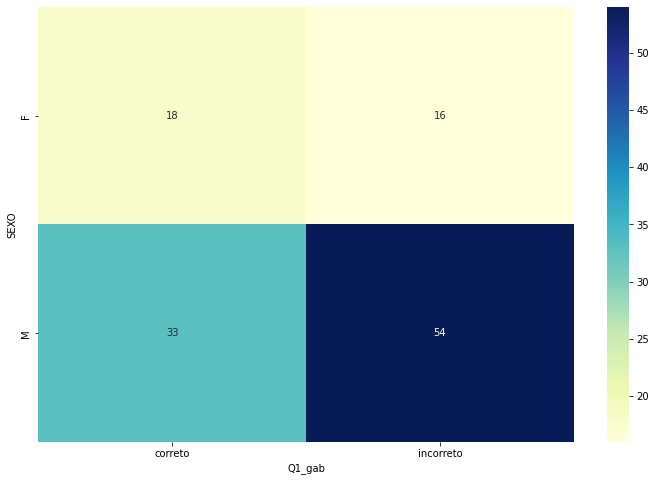

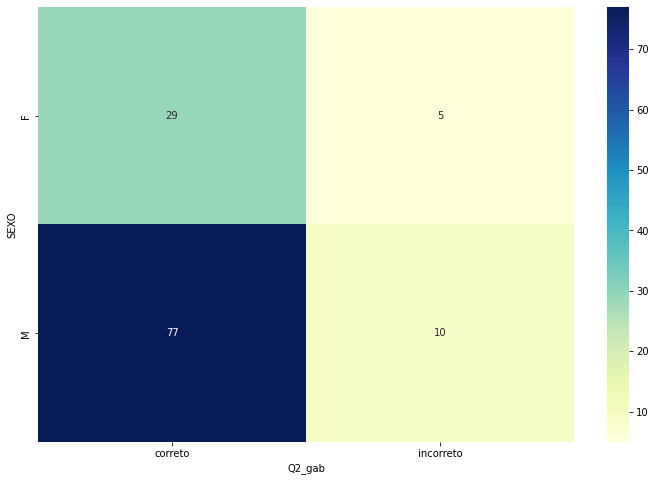

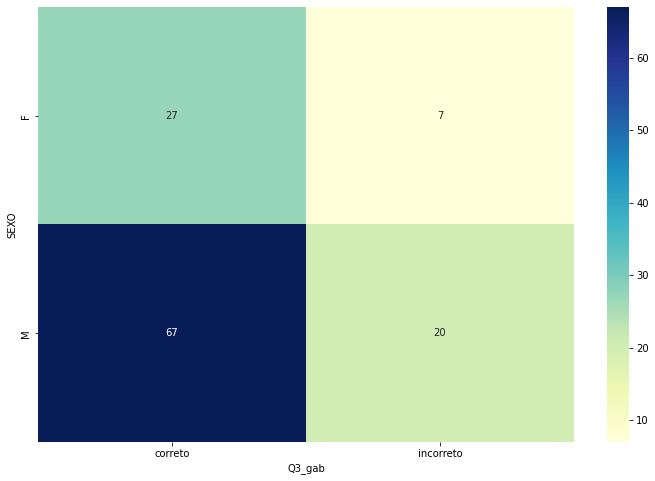

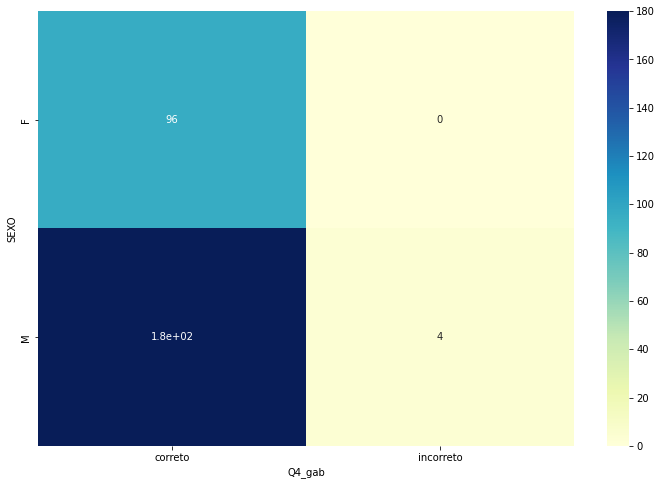

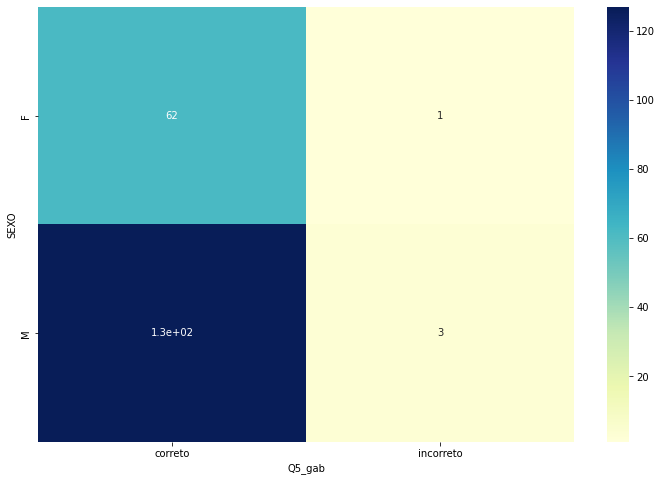

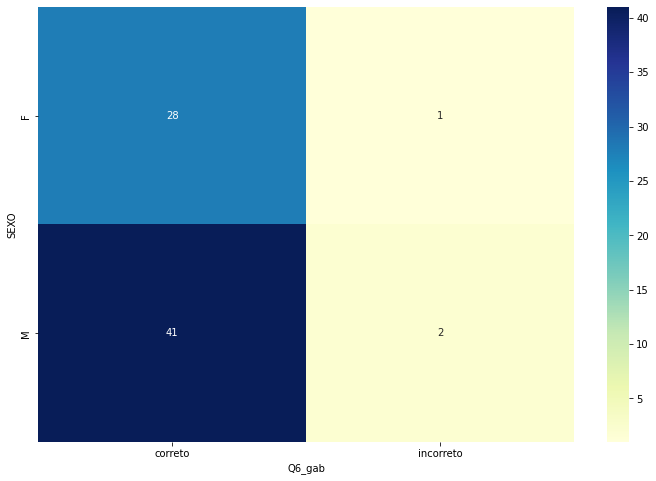

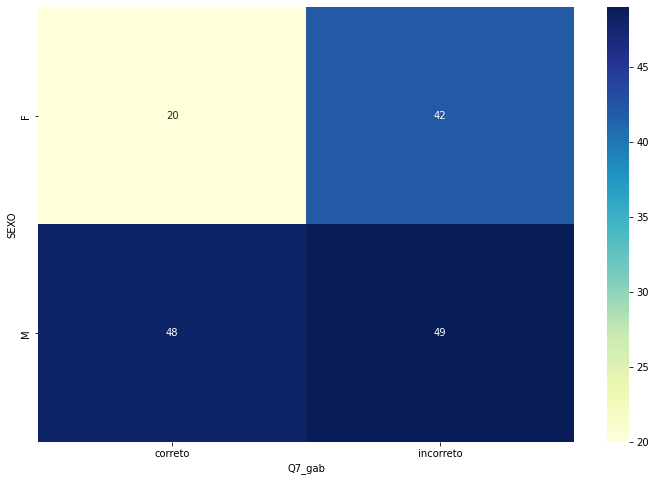

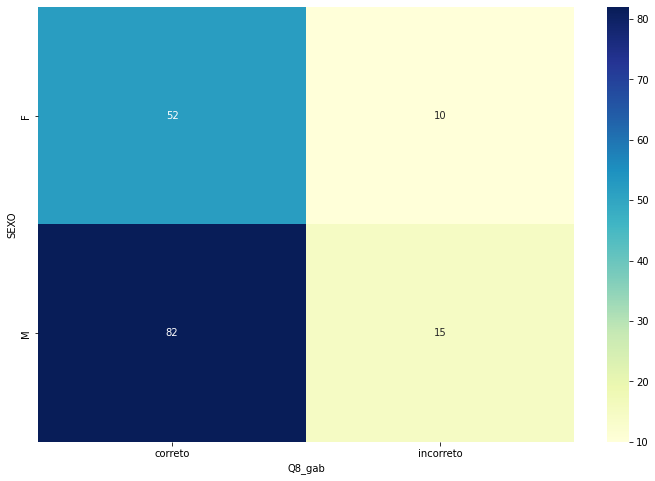

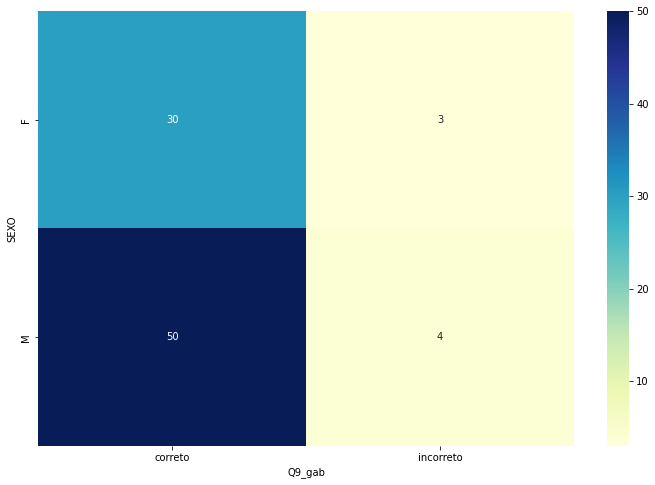

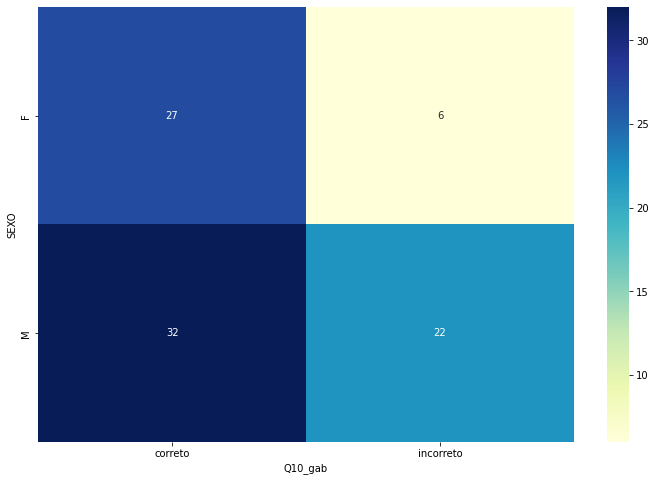

In [ ]:
for i in df[['Q1_gab','Q2_gab','Q3_gab','Q4_gab','Q5_gab','Q6_gab','Q7_gab','Q8_gab','Q9_gab','Q10_gab']]:
  contigency = pd.crosstab(df['SEXO'], df[i]) 
  estatistica, p_value, gl, expected = chi2_contingency(contigency)
  plt.figure(figsize=(12,8)) 
  sns.heatmap(contigency[['correto','incorreto']], annot=True, cmap="YlGnBu"); 
  contigency_pct = pd.crosstab(df['SEXO'], df[i], normalize='index')
  print(contigency_pct)
  if p_value < 0.05:
    print('Como p-valor = {:.3}, há evidências suficientes para rejeitar a hipótese nula ao nível de significância de 5%'.format(p_value))
  else:
    print('Como p-valor = {:.3}, não há evidências suficientes para rejeitar a hipótese nula ao nível de significância de 5%'.format(p_value))

O p-valor é 29%, isso significa que não se rejeita a hipótese nula ao nível de significância de 5%. A hipótese nula é de que o Sexo do entrevistado e o erro ou acerto na questão são independentes.

### Envolvido em acidente X acerto ou erro nas questões

Q1_gab                SI   correto  incorreto
ENVOL_ACIDENTE                               
N               0.565854  0.180488   0.253659
S               0.611940  0.179104   0.208955
Como p-valor = 0.74, não há evidências suficientes para rejeitar a hipótese nula ao nível de significância de 5%
Q2_gab                SI   correto  incorreto
ENVOL_ACIDENTE                               
N               0.565854  0.370732   0.063415
S               0.611940  0.373134   0.014925
Como p-valor = 0.287, não há evidências suficientes para rejeitar a hipótese nula ao nível de significância de 5%
Q3_gab                SI   correto  incorreto
ENVOL_ACIDENTE                               
N               0.565854  0.331707   0.102439
S               0.611940  0.313433   0.074627
Como p-valor = 0.724, não há evidências suficientes para rejeitar a hipótese nula ao nível de significância de 5%
Q4_gab           correto  incorreto
ENVOL_ACIDENTE                     
N               0.995122   0.004878

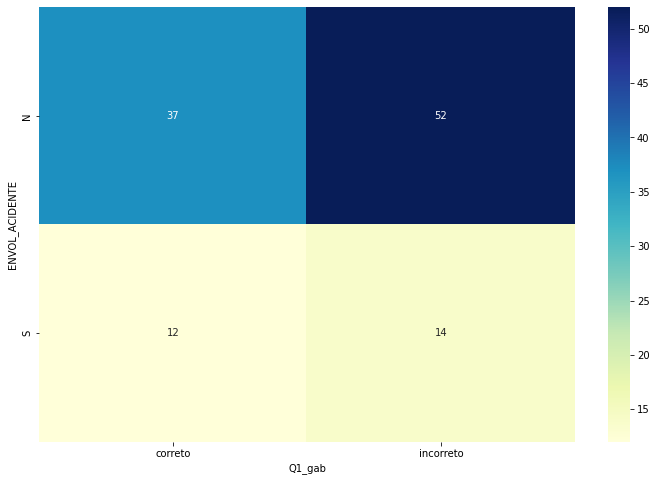

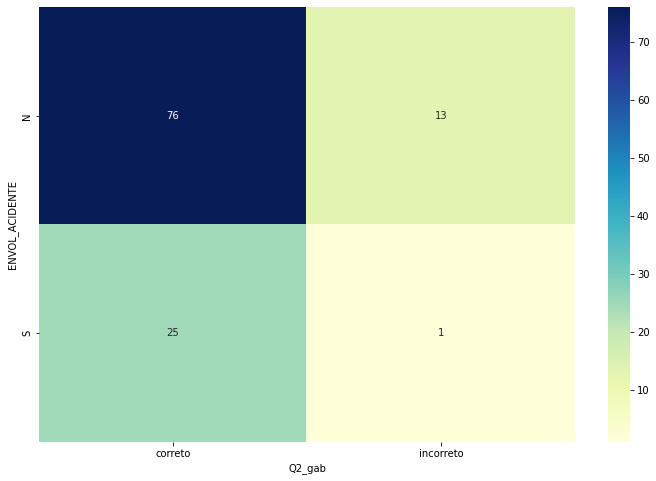

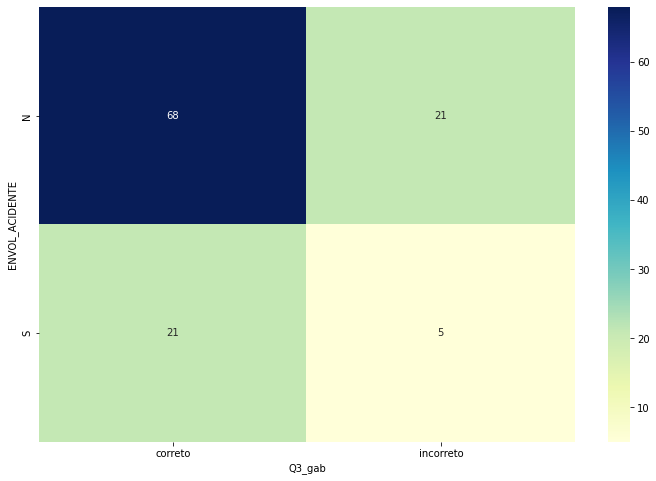

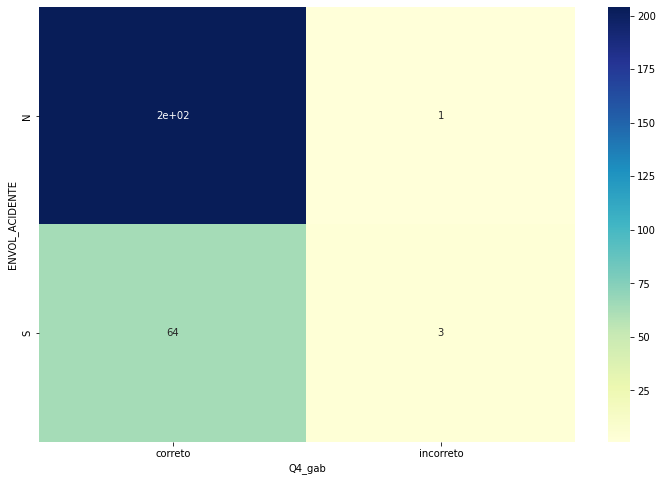

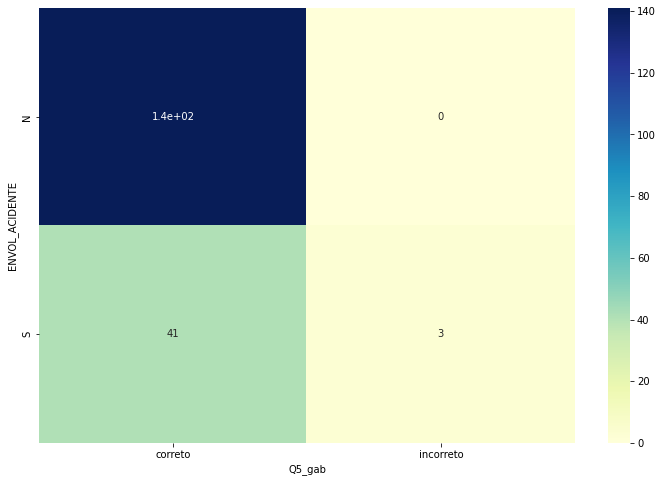

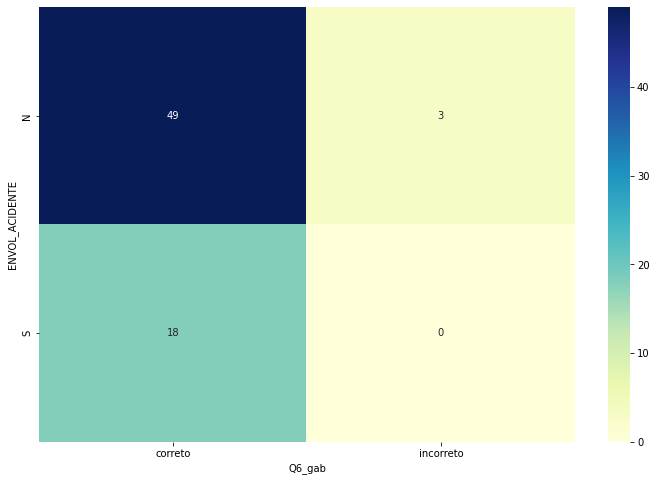

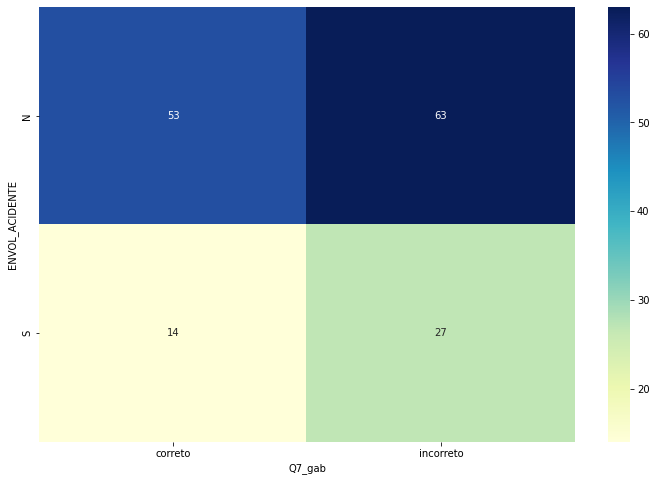

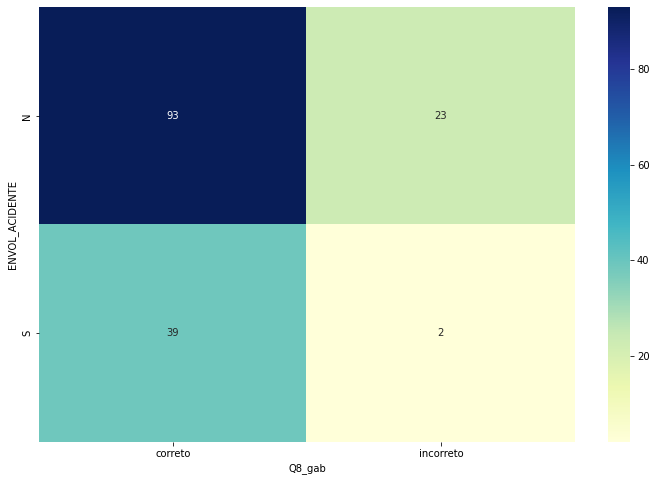

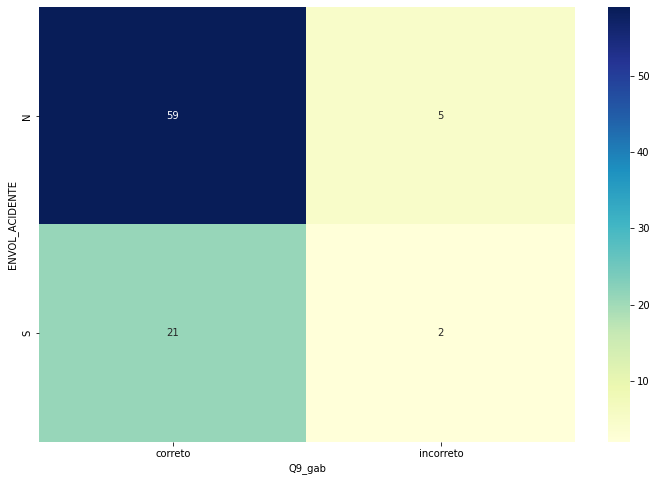

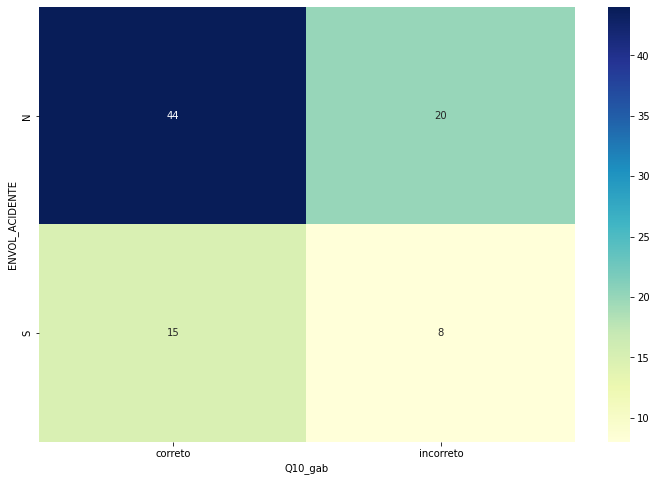

In [ ]:
for i in df[['Q1_gab','Q2_gab','Q3_gab','Q4_gab','Q5_gab','Q6_gab','Q7_gab','Q8_gab','Q9_gab','Q10_gab']]:
  contigency = pd.crosstab(df['ENVOL_ACIDENTE'], df[i]) 
  estatistica, p_value, gl, expected = chi2_contingency(contigency)
  plt.figure(figsize=(12,8)) 
  sns.heatmap(contigency[['correto','incorreto']], annot=True, cmap="YlGnBu"); 
  contigency_pct = pd.crosstab(df['ENVOL_ACIDENTE'], df[i], normalize='index')
  print(contigency_pct)
  if p_value < 0.05:
    print('Como p-valor = {:.3}, há evidências suficientes para rejeitar a hipótese nula ao nível de significância de 5%'.format(p_value))
  else:
    print('Como p-valor = {:.3}, não há evidências suficientes para rejeitar a hipótese nula ao nível de significância de 5%'.format(p_value))

###Faixa etária (dividida por quartis) x Envolvido em acidente

####criando faixa etária

In [ ]:
#criando nova variável com a faixa etária
df['faixa_etaria']=pd.cut(df['IDADE'], bins=[19, 37, 42, 52, 79],
labels=['19 a 37 anos', '38 a 42 anos', '43 a 52 anos', '52 a 79 anos'])

In [ ]:
#descrição idade
df['IDADE'].describe()

count    280.000000
mean      44.121429
std       11.761957
min       19.000000
25%       37.000000
50%       42.000000
75%       52.000000
max       79.000000
Name: IDADE, dtype: float64

faixa_etaria    19 a 37 anos  38 a 42 anos  43 a 52 anos  52 a 79 anos
ENVOL_ACIDENTE                                                        
N                   0.318627      0.225490      0.220588      0.235294
S                   0.268657      0.238806      0.253731      0.238806
Como p-valor = 0.874, não há evidências suficientes para rejeitar a hipótese nula ao nível de significância de 5%


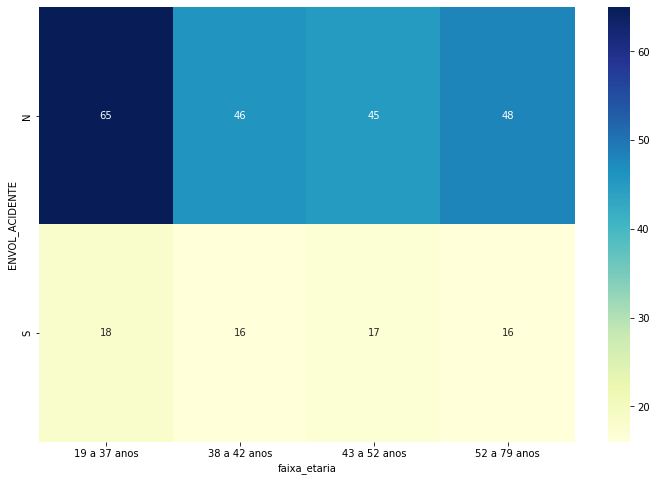

In [ ]:
for i in df[['faixa_etaria']]:
  contigency = pd.crosstab(df['ENVOL_ACIDENTE'], df[i]) 
  estatistica, p_value, gl, expected = chi2_contingency(contigency)
  plt.figure(figsize=(12,8)) 
  sns.heatmap(contigency[['19 a 37 anos','38 a 42 anos','43 a 52 anos','52 a 79 anos']], annot=True, cmap="YlGnBu"); 
  contigency_pct = pd.crosstab(df['ENVOL_ACIDENTE'], df[i], normalize='index')
  print(contigency_pct)
  if p_value < 0.05:
    print('Como p-valor = {:.3}, há evidências suficientes para rejeitar a hipótese nula ao nível de significância de 5%'.format(p_value))
  else:
    print('Como p-valor = {:.3}, não há evidências suficientes para rejeitar a hipótese nula ao nível de significância de 5%'.format(p_value))

### faixa etária (divida a cada 10 anos) x Envolvido em Acidente  

In [ ]:
df['faixa_etaria2']=pd.cut(df['IDADE'], bins=[19, 29, 39, 49, 59, 69, 79],
labels=['19 a 29 anos', '30 a 39 anos', '40 a 49 anos', '50 a 59 anos','60 a 69 anos','70 a 79 anos'])

faixa_etaria2   19 a 29 anos  30 a 39 anos  ...  60 a 69 anos  70 a 79 anos
ENVOL_ACIDENTE                              ...                            
N                   0.083333      0.303922  ...      0.088235      0.024510
S                   0.059701      0.253731  ...      0.134328      0.014925

[2 rows x 6 columns]
Como p-valor = 0.372, não há evidências suficientes para rejeitar a hipótese nula ao nível de significância de 5%


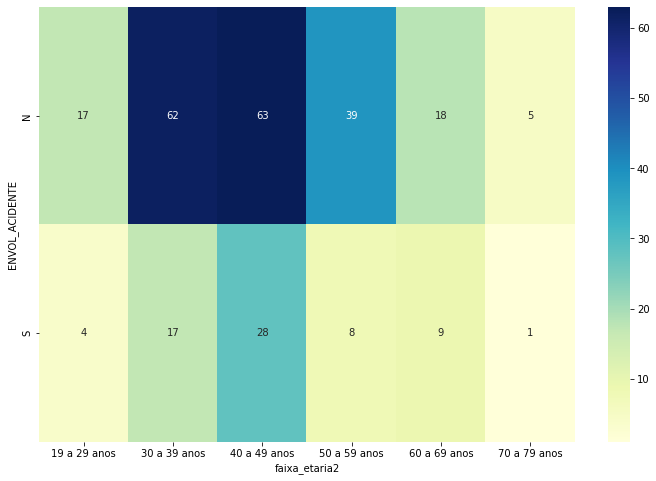

In [ ]:
for i in df[['faixa_etaria2']]:
  contigency = pd.crosstab(df['ENVOL_ACIDENTE'], df[i]) 
  estatistica, p_value, gl, expected = chi2_contingency(contigency)
  plt.figure(figsize=(12,8)) 
  sns.heatmap(contigency[['19 a 29 anos', '30 a 39 anos','40 a 49 anos', '50 a 59 anos','60 a 69 anos','70 a 79 anos']], annot=True, cmap="YlGnBu"); 
  contigency_pct = pd.crosstab(df['ENVOL_ACIDENTE'], df[i], normalize='index')
  print(contigency_pct)
  if p_value < 0.05:
    print('Como p-valor = {:.3}, há evidências suficientes para rejeitar a hipótese nula ao nível de significância de 5%'.format(p_value))
  else:
    print('Como p-valor = {:.3}, não há evidências suficientes para rejeitar a hipótese nula ao nível de significância de 5%'.format(p_value))

### Faixa etária X acerto ou erro nas questões (dividida por quartis)

Q1_gab              SI   correto  incorreto
faixa_etaria                               
19 a 37 anos  0.542169  0.192771   0.265060
38 a 42 anos  0.612903  0.145161   0.241935
43 a 52 anos  0.507463  0.238806   0.253731
52 a 79 anos  0.621212  0.136364   0.242424
Como p-valor = 0.722, não há evidências suficientes para rejeitar a hipótese nula ao nível de significância de 5%
Q2_gab              SI   correto  incorreto
faixa_etaria                               
19 a 37 anos  0.542169  0.373494   0.084337
38 a 42 anos  0.612903  0.387097   0.000000
43 a 52 anos  0.507463  0.432836   0.059701
52 a 79 anos  0.621212  0.318182   0.060606
Como p-valor = 0.31, não há evidências suficientes para rejeitar a hipótese nula ao nível de significância de 5%
Q3_gab              SI   correto  incorreto
faixa_etaria                               
19 a 37 anos  0.542169  0.385542   0.072289
38 a 42 anos  0.612903  0.290323   0.096774
43 a 52 anos  0.507463  0.388060   0.104478
52 a 79 anos  0.621212  0

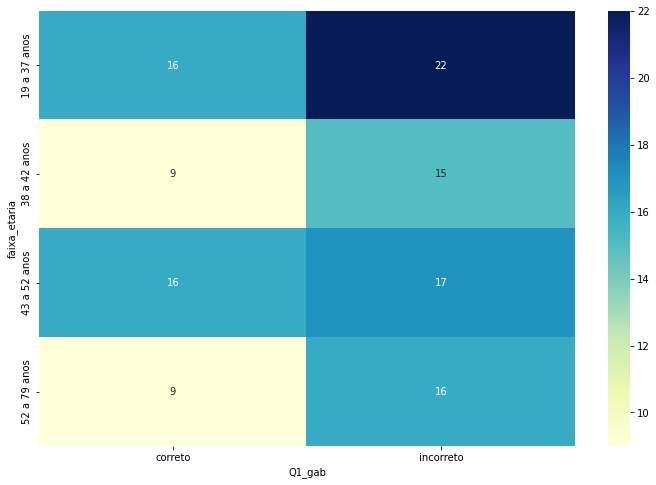

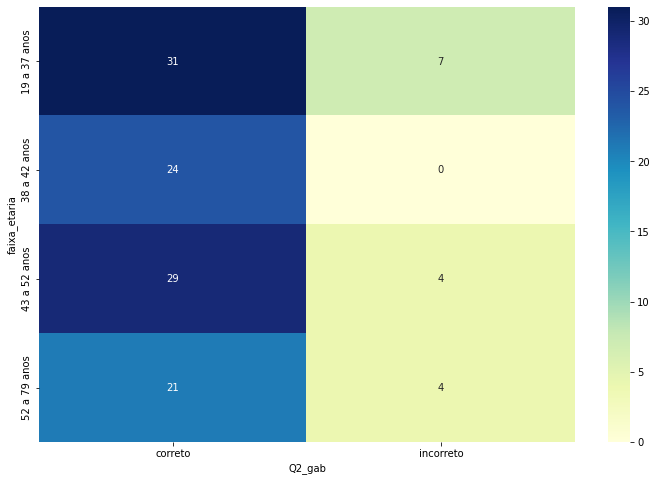

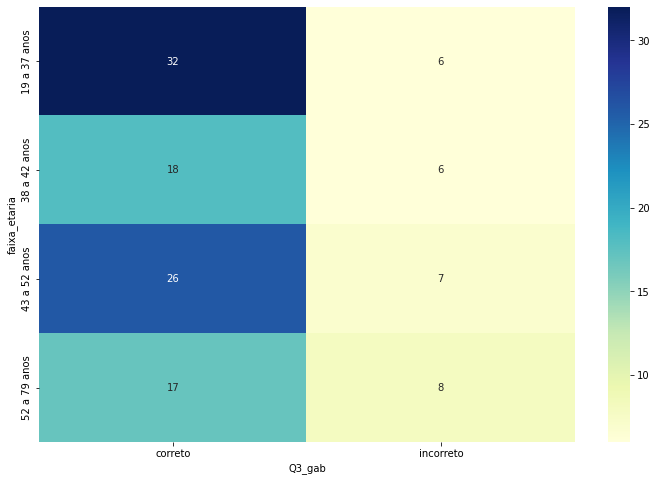

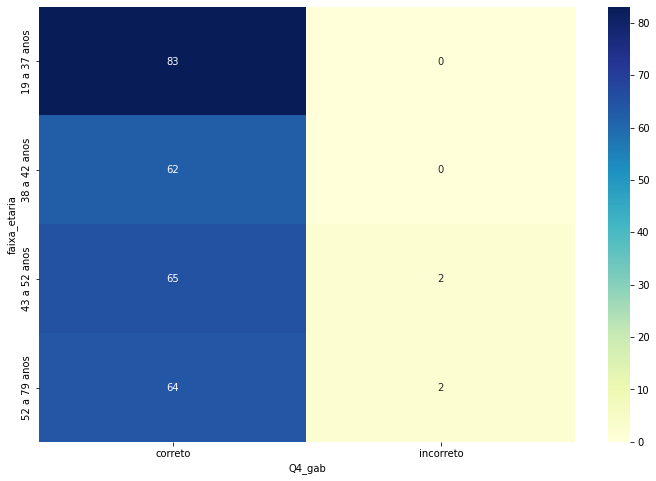

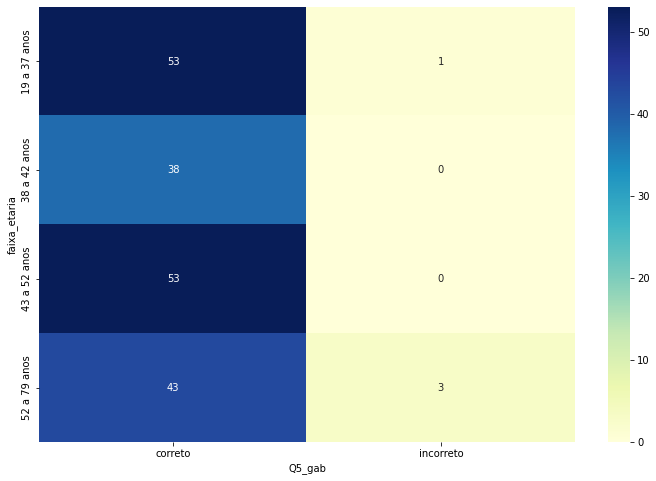

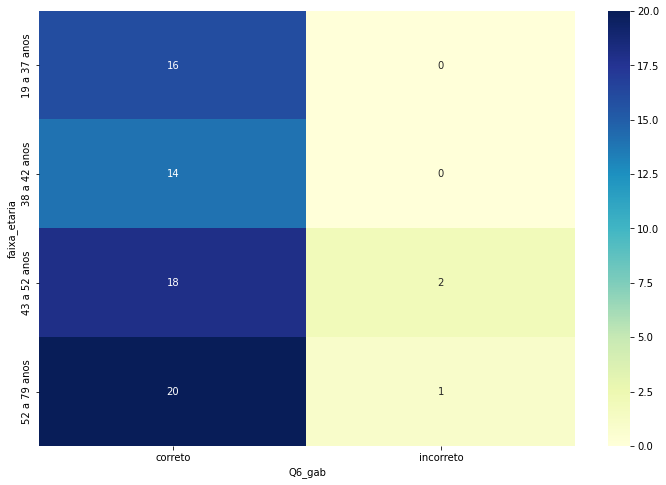

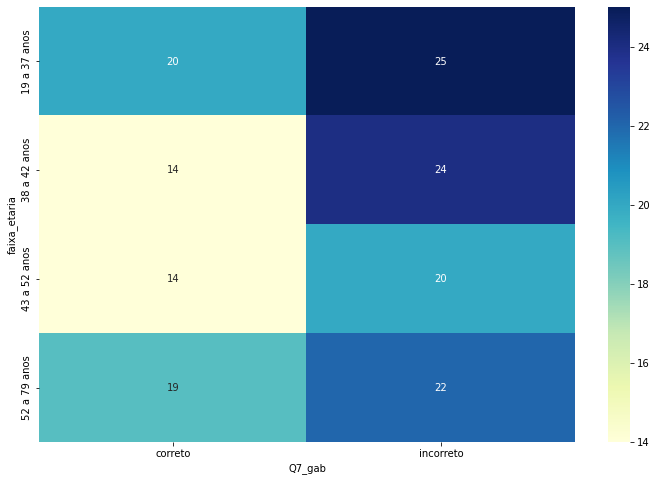

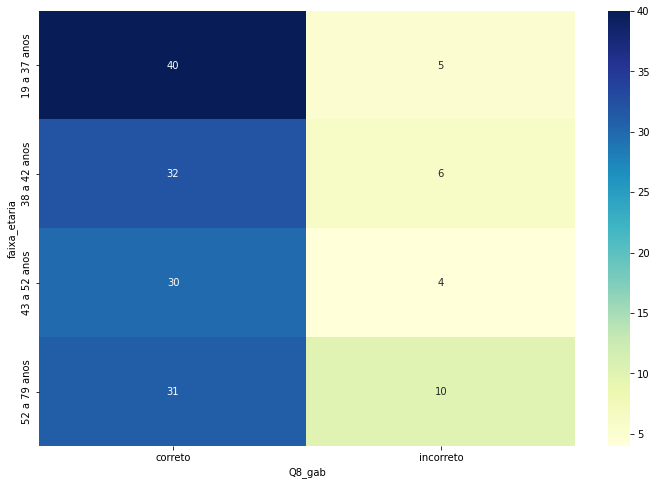

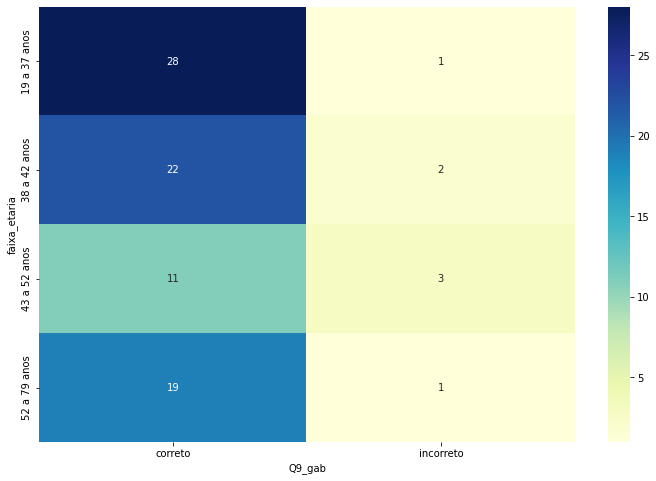

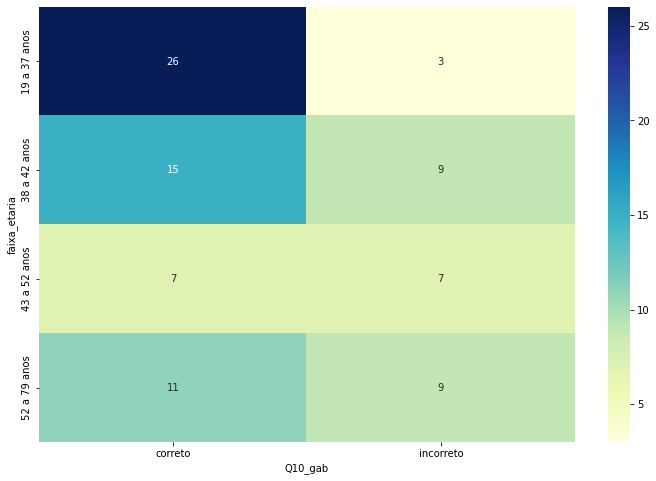

In [ ]:
for i in df[['Q1_gab','Q2_gab','Q3_gab','Q4_gab','Q5_gab','Q6_gab','Q7_gab','Q8_gab','Q9_gab','Q10_gab']]:
  contigency = pd.crosstab(df['faixa_etaria'], df[i]) 
  estatistica, p_value, gl, expected = chi2_contingency(contigency)
  plt.figure(figsize=(12,8)) 
  sns.heatmap(contigency[['correto','incorreto']], annot=True, cmap="YlGnBu"); 
  contigency_pct = pd.crosstab(df['faixa_etaria'], df[i], normalize='index')
  print(contigency_pct)
  if p_value < 0.05:
    print('Como p-valor = {:.3}, há evidências suficientes para rejeitar a hipótese nula ao nível de significância de 5%'.format(p_value))
  else:
    print('Como p-valor = {:.3}, não há evidências suficientes para rejeitar a hipótese nula ao nível de significância de 5%'.format(p_value))

### Faixa Etária X acerto ou erro nas questões (dividida por 10 anos)

Q1_gab               SI   correto  incorreto
faixa_etaria2                               
19 a 29 anos   0.476190  0.238095   0.285714
30 a 39 anos   0.556962  0.164557   0.278481
40 a 49 anos   0.591398  0.182796   0.225806
50 a 59 anos   0.588235  0.176471   0.235294
60 a 69 anos   0.535714  0.214286   0.250000
70 a 79 anos   0.666667  0.000000   0.333333
Como p-valor = 0.977, não há evidências suficientes para rejeitar a hipótese nula ao nível de significância de 5%
Q2_gab               SI   correto  incorreto
faixa_etaria2                               
19 a 29 anos   0.476190  0.428571   0.095238
30 a 39 anos   0.556962  0.379747   0.063291
40 a 49 anos   0.591398  0.365591   0.043011
50 a 59 anos   0.588235  0.392157   0.019608
60 a 69 anos   0.535714  0.357143   0.107143
70 a 79 anos   0.666667  0.333333   0.000000
Como p-valor = 0.905, não há evidências suficientes para rejeitar a hipótese nula ao nível de significância de 5%
Q3_gab               SI   correto  incorreto
faixa_e

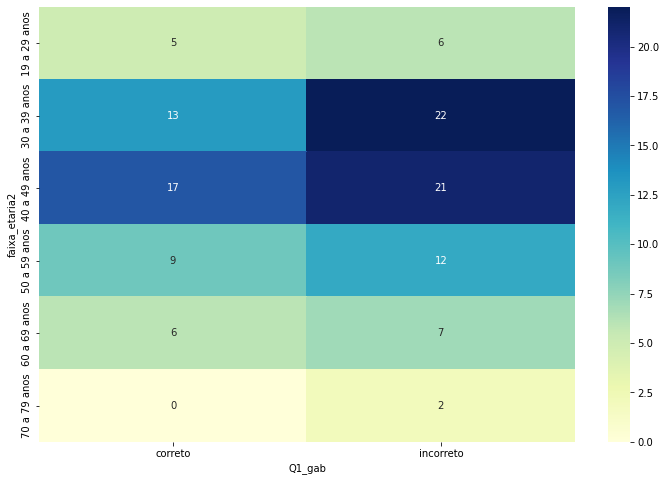

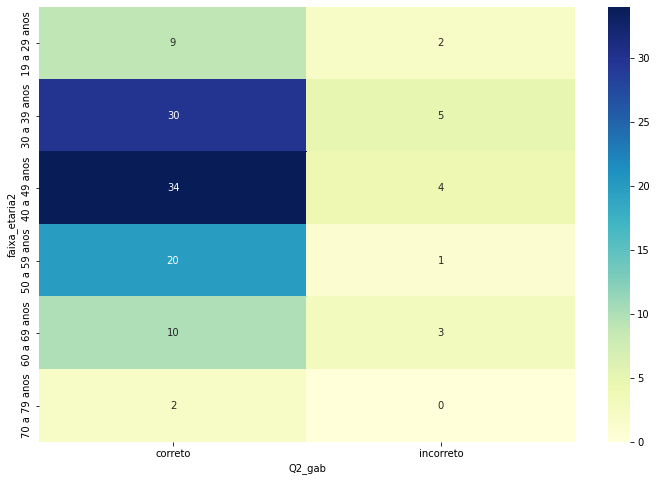

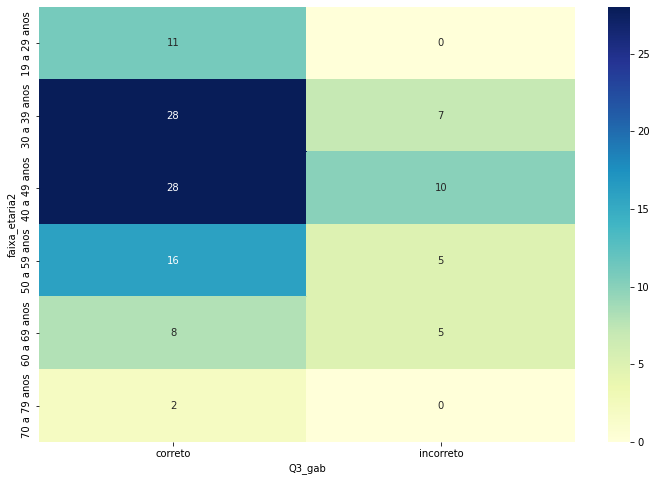

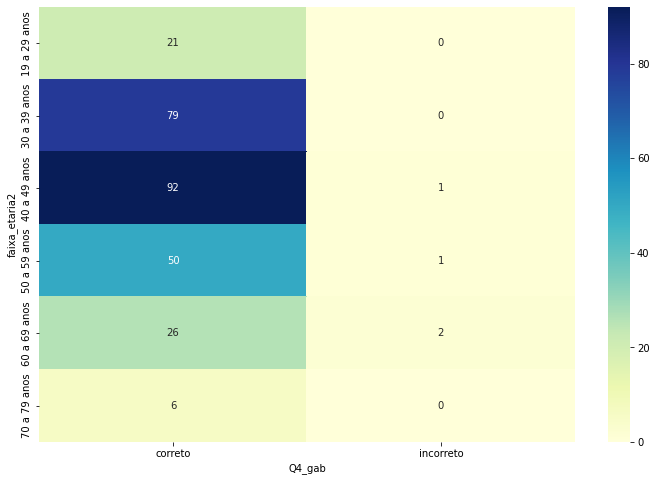

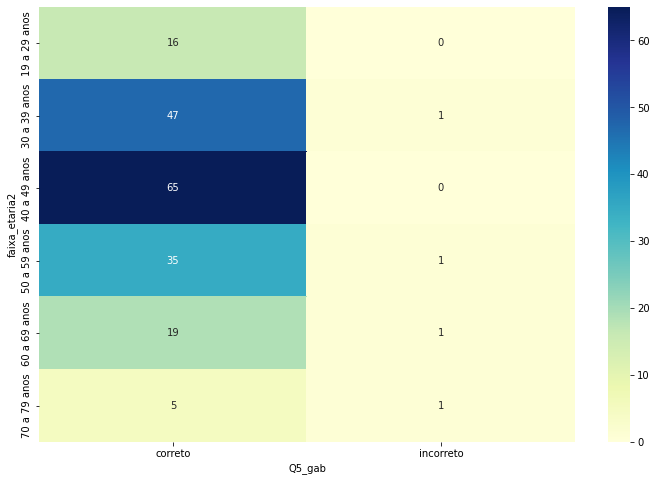

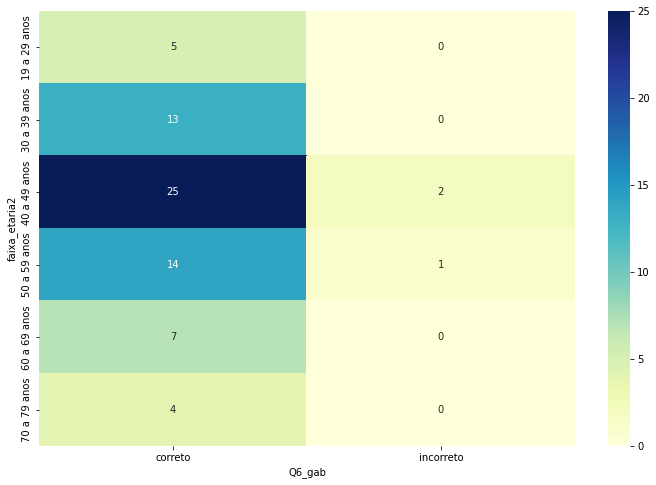

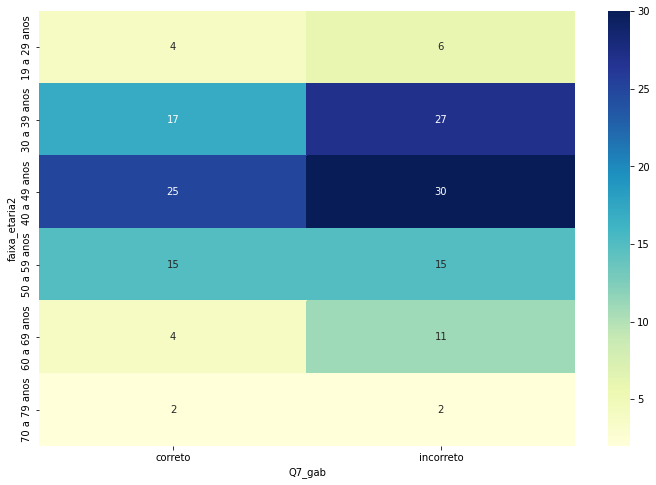

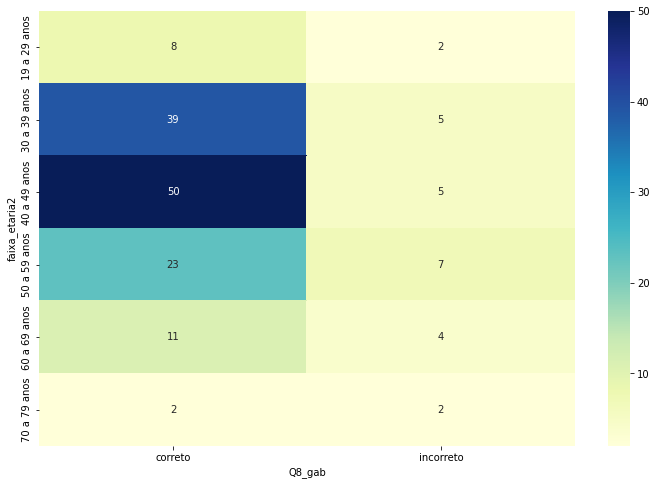

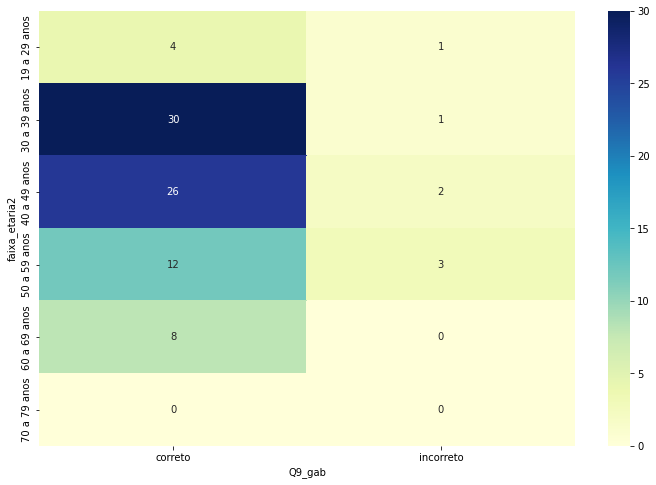

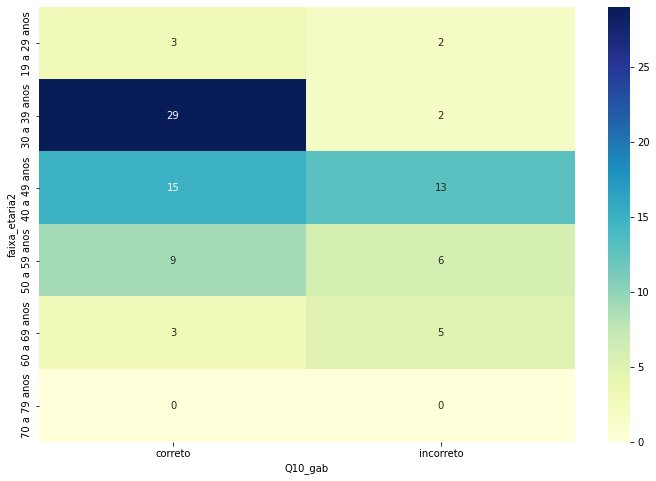

In [ ]:
for i in df[['Q1_gab','Q2_gab','Q3_gab','Q4_gab','Q5_gab','Q6_gab','Q7_gab','Q8_gab','Q9_gab','Q10_gab']]:
  contigency = pd.crosstab(df['faixa_etaria2'], df[i]) 
  estatistica, p_value, gl, expected = chi2_contingency(contigency)
  plt.figure(figsize=(12,8)) 
  sns.heatmap(contigency[['correto','incorreto']], annot=True, cmap="YlGnBu"); 
  contigency_pct = pd.crosstab(df['faixa_etaria2'], df[i], normalize='index')
  print(contigency_pct)
  if p_value < 0.05:
    print('Como p-valor = {:.3}, há evidências suficientes para rejeitar a hipótese nula ao nível de significância de 5%'.format(p_value))
  else:
    print('Como p-valor = {:.3}, não há evidências suficientes para rejeitar a hipótese nula ao nível de significância de 5%'.format(p_value))

### Categoria CNH X acerto ou erro das questões

Q1_gab               SI   correto  incorreto
CATEGORIA_CNH                               
A              0.631579  0.157895   0.210526
AB             0.521739  0.165217   0.313043
B              0.617647  0.176471   0.205882
Como p-valor = 0.457, não há evidências suficientes para rejeitar a hipótese nula ao nível de significância de 5%
Q2_gab               SI   correto  incorreto
CATEGORIA_CNH                               
A              0.631579  0.368421   0.000000
AB             0.521739  0.391304   0.086957
B              0.617647  0.362745   0.019608
Como p-valor = 0.136, não há evidências suficientes para rejeitar a hipótese nula ao nível de significância de 5%
Q3_gab               SI   correto  incorreto
CATEGORIA_CNH                               
A              0.631579  0.263158   0.105263
AB             0.521739  0.365217   0.113043
B              0.617647  0.323529   0.058824
Como p-valor = 0.482, não há evidências suficientes para rejeitar a hipótese nula ao nível de sig

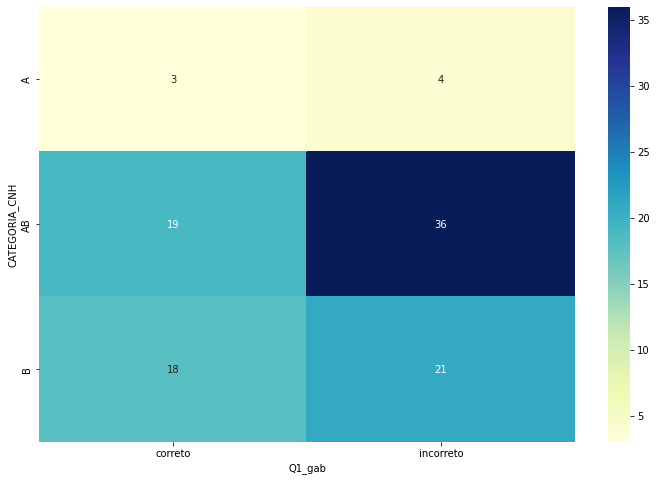

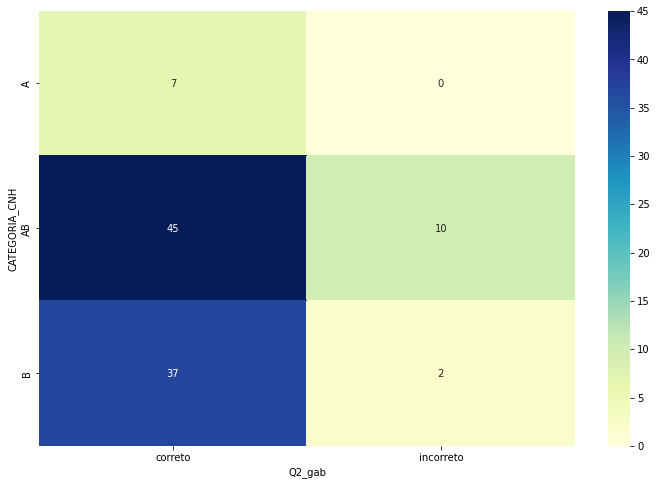

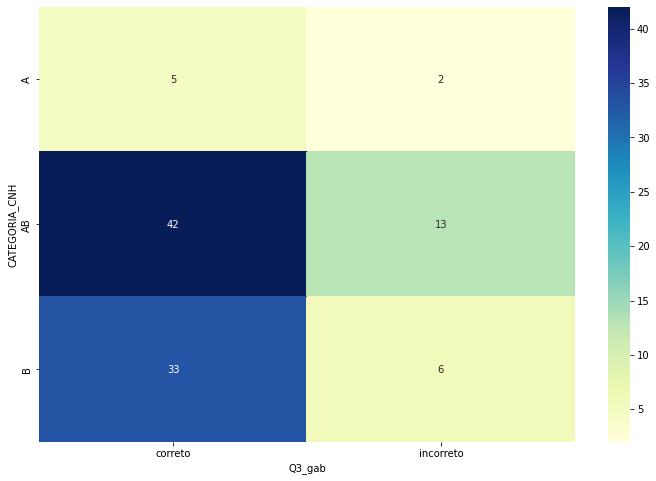

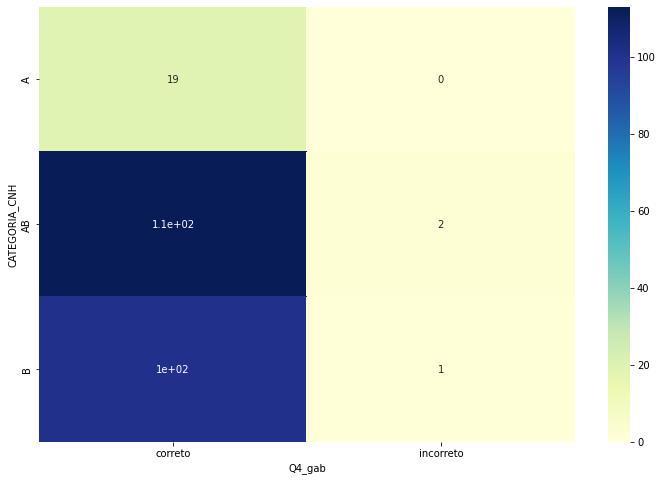

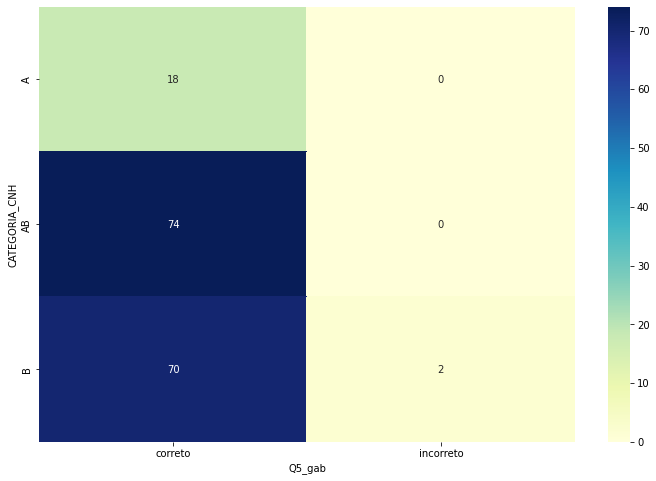

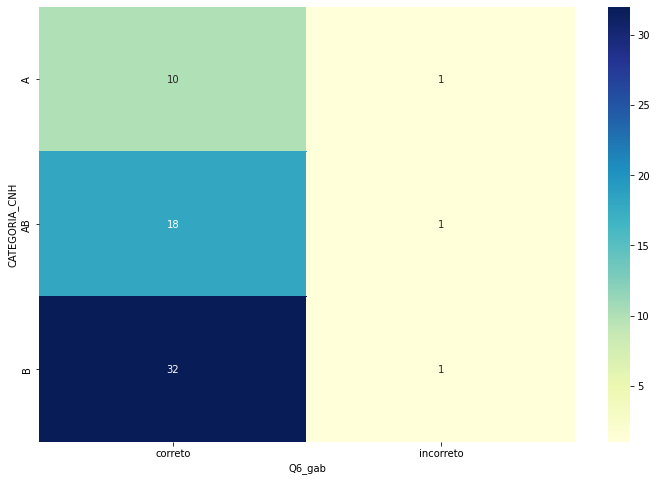

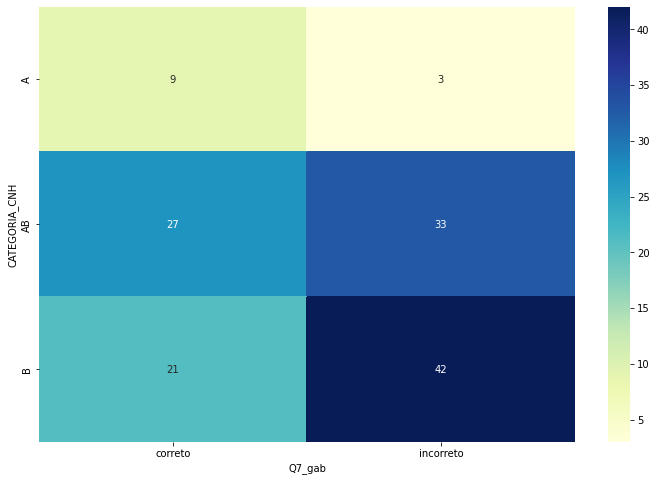

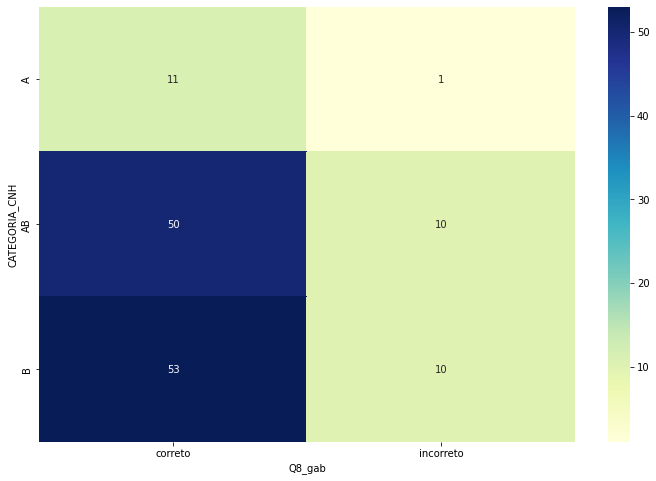

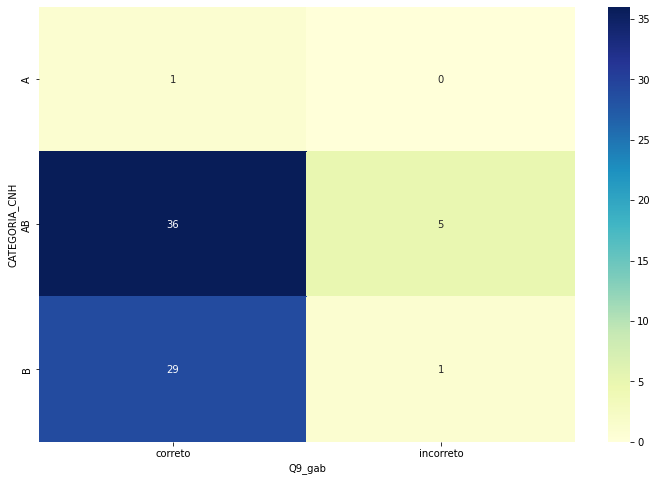

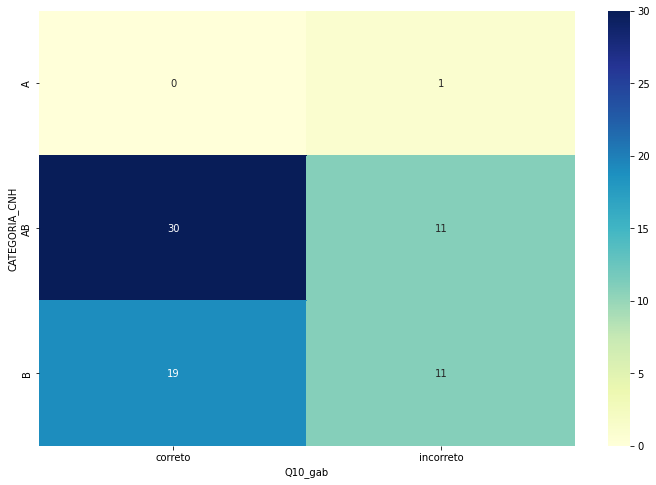

In [ ]:
for i in df[['Q1_gab','Q2_gab','Q3_gab','Q4_gab','Q5_gab','Q6_gab','Q7_gab','Q8_gab','Q9_gab','Q10_gab']]:
  contigency = pd.crosstab(df.query('CATEGORIA_CNH == "A" or CATEGORIA_CNH == "B" or CATEGORIA_CNH == "AB"')['CATEGORIA_CNH'], df[i]) 
  estatistica, p_value, gl, expected = chi2_contingency(contigency)
  plt.figure(figsize=(12,8)) 
  sns.heatmap(contigency[['correto','incorreto']], annot=True, cmap="YlGnBu"); 
  contigency_pct = pd.crosstab(df.query('CATEGORIA_CNH == "A" or CATEGORIA_CNH == "B" or CATEGORIA_CNH == "AB"')['CATEGORIA_CNH'], df[i], normalize='index')
  print(contigency_pct)
  if p_value < 0.05:
    print('Como p-valor = {:.3}, há evidências suficientes para rejeitar a hipótese nula ao nível de significância de 5%'.format(p_value))
  else:
    print('Como p-valor = {:.3}, não há evidências suficientes para rejeitar a hipótese nula ao nível de significância de 5%'.format(p_value))